# Trivago Case Study Data Scientist – Marketplace
* Data Exploration and A/B testing Analysis
* Submitted By: Aditya Rawat (adityarawat118@gmail.com)
* Date: 31 March 2020




## Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas.plotting
from IPython import display
from IPython.display import HTML
from ipywidgets import interact, widgets
from matplotlib.pyplot import *
%matplotlib inline

In [2]:
# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '11px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
]
sns.set()

## Data Cleaning

In [3]:
# DataFrame for Test1.csv(Test executed in Feb'2019)
df_test1 = pd.read_csv('test1.csv', parse_dates=['ymd'])
df_test1.style.set_table_styles(styles)

#### _Variables:_
* The data is aggregated by **ymd** (the date)
* **platform** (the country-specific trivago platform)
* **group** (control or test).
* _Metrics_
* **visits** - how many website visits from our users were logged 
* **clicks** - how many times our users clicked in one of our prices and were re-directed to the website of one of our advertisers. Note that each individual visit may or may not include clicks.
* **revenue** - how much money (in EUR) was generated for trivago. You can work under the assumption that this revenue is generated under a CPC model
* **bookings** - how many accommodation reservations were made in our advertisers’ websites. 
* **booking_amount** - the corresponding amount (in EUR) paid by the users for the accommodation reservations.

In [4]:
# Info
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 8 columns):
ymd               403 non-null datetime64[ns]
locale            404 non-null object
group             405 non-null object
visits            399 non-null float64
clicks            399 non-null float64
revenue           400 non-null float64
bookings          400 non-null float64
booking_amount    401 non-null float64
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 25.8+ KB


In [5]:
#Dropping rows with NAN values
df_test1.dropna(inplace=True)

In [6]:
#For Mean Imputation of NAN Values after dropping rows with ymd, locale and group as NAN
# df_test1 = df_test1[pd.notnull(df_test1['ymd'])]
# df_test1 = df_test1[pd.notnull(df_test1['locale'])]
# df_test1 = df_test1[pd.notnull(df_test1['group'])]
# df_test1['visits'] = df_test1.groupby(['locale', 'group'])['visits'].transform(lambda x: x.fillna(int(x.mean())))
# df_test1['clicks'] = df_test1.groupby(['locale', 'group'])['clicks'].transform(lambda x: x.fillna(int(x.mean())))
# df_test1['revenue'] = df_test1.groupby(['locale', 'group'])['revenue'].transform(lambda x: x.fillna(x.mean()))
# df_test1['bookings'] = df_test1.groupby(['locale', 'group'])['bookings'].transform(lambda x: x.fillna(int(x.mean())))
# df_test1['booking_amount'] = df_test1.groupby(['locale', 'group'])['booking_amount'].transform(lambda x: x.fillna(x.mean()))

#### Generating New Metrics and Normalising Data
* **Week_day** - To analyse if there are any variations on weekdays
* **day** - For finding day-wise trend in the data 
* **revenueperclick** - Revenue generated per click
* **clickspervisit** - For tracking number of clicks made per visitor **(Key Metric)** 
* **bookingspervisit** - For tracking number of bookings made per visitor 
* **bookingsperclick** - For tracking number of bookings after user clicked and visited the advertisers websites **(Key Metric)**

In [7]:
#Generating New metrics for Test1.csv
df_test1['week_day'] = df_test1.ymd.dt.weekday_name
df_test1['day'] = df_test1.ymd.dt.day
df_test1['clickspervisit'] = df_test1.clicks.values/df_test1.visits.values  
df_test1['bookingspervisit'] = df_test1.bookings.values/df_test1.visits.values
df_test1['revenueperclick'] = df_test1.revenue.values/df_test1.clicks.values
df_test1['bookingsperclick'] = df_test1.bookings.values/df_test1.clicks.values
df_test1.style.set_table_styles(styles)

## Data Cleaning for Test2.csv

In [8]:
# DataFrame for Test2.csv(Test executed in May'2019)
df_test2 = pd.read_csv('test2.csv',parse_dates=['ymd'])
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 8 columns):
ymd               443 non-null datetime64[ns]
locale            442 non-null object
group             447 non-null object
visits            447 non-null float64
clicks            445 non-null float64
revenue           447 non-null float64
bookings          448 non-null float64
booking_amount    445 non-null float64
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 28.5+ KB


In [9]:
#Dropping records with NAN values
df_test2.dropna(inplace=True)

In [10]:
#For Mean Imputation of NAN Values after dropping rows with ymd, locale and group as NAN
# df_test2 = df_test2[pd.notnull(df_test2['ymd'])]
# df_test2 = df_test2[pd.notnull(df_test2['locale'])]
# df_test2 = df_test2[pd.notnull(df_test2['group'])]
# df_test2['visits'] = df_test2.groupby(['locale', 'group'])['visits'].transform(lambda x: x.fillna(int(x.mean())))
# df_test2['clicks'] = df_test2.groupby(['locale', 'group'])['clicks'].transform(lambda x: x.fillna(int(x.mean())))
# df_test2['revenue'] = df_test2.groupby(['locale', 'group'])['revenue'].transform(lambda x: x.fillna(x.mean()))
# df_test2['bookings'] = df_test2.groupby(['locale', 'group'])['bookings'].transform(lambda x: x.fillna(int(x.mean())))
# df_test2['booking_amount'] = df_test2.groupby(['locale', 'group'])['booking_amount'].transform(lambda x: x.fillna(x.mean()))

In [11]:
#Generating New metrics for Test1.csv
df_test2['day'] = df_test2.ymd.dt.day
df_test2['week_day'] = df_test2.ymd.dt.weekday_name
df_test2['clickspervisit'] = df_test2.clicks.values/df_test2.visits.values  
df_test2['bookingspervisit'] = df_test2.bookings.values/df_test2.visits.values
df_test2['revenueperclick'] = df_test2.revenue.values/df_test2.clicks.values
df_test2['bookingsperclick'] = df_test2.bookings.values/df_test2.clicks.values

## What is the most valuable platform for trivago? Why?

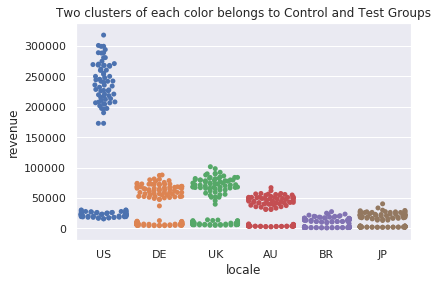

In [12]:
# Beeswarm Plot
sns.swarmplot(x="locale", y="revenue", data=df_test1)
sns.swarmplot(x="locale", y="revenue", data=df_test2)
title('Two clusters of each color belongs to Control and Test Groups');

              revenue
locale               
US      134740.562719
UK       42032.748076
DE       36191.544066
AU       25706.005025
JP       12448.897231
BR        8060.547557

Highest Revenue for Trivago for Feb Month is from Platform: US


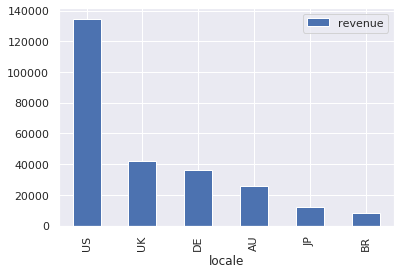

In [13]:
#Bar Plot for Test1.csv
print(pd.DataFrame(df_test1.groupby('locale').revenue.mean()).sort_values(by='revenue', ascending=False))
pd.DataFrame(df_test1.groupby('locale').revenue.mean()).sort_values(by='revenue', ascending=False).plot(kind='bar')
print('')
print('Highest Revenue for Trivago for Feb Month is from Platform: US') 
plt.show()

              revenue
locale               
US      124922.095817
UK       39684.999279
DE       35611.418522
AU       24850.866076
JP       12572.925442
BR        8531.082098

Highest Revenue for Trivago for May Month: US


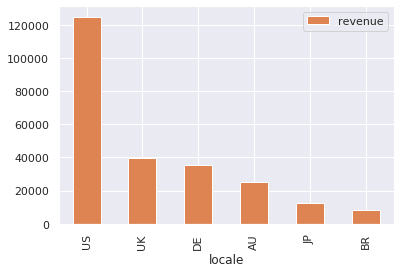

In [14]:
#Bar Plot for Test2.csv
print(pd.DataFrame(df_test2.groupby('locale').revenue.mean()).sort_values(by='revenue', ascending=False))
pd.DataFrame(df_test2.groupby('locale').revenue.mean()).sort_values(by='revenue', ascending=False).plot(kind='bar',color='C1')
print('')
print('Highest Revenue for Trivago for May Month: US')
plt.show()

As in Both Months the revenue generated from Platform, **US** is the highest, hence it's the **most valuable Platform for Trivago** 

## What are the global and platform average revenue per click?

#### Avg Revenue per click For Feb Month(test1.csv)

        Avg RevenuePerClick
locale                     
US                 1.276122
AU                 0.994596
UK                 0.802390
JP                 0.789188
DE                 0.677867
BR                 0.403390

Global:       0.8235135235011892


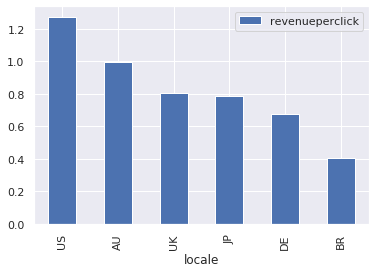

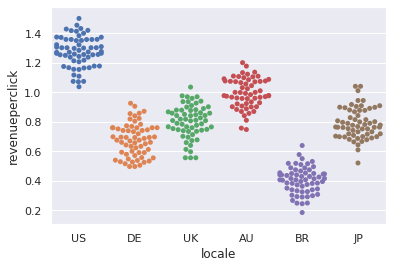

In [15]:
#Bar Plot and BeeSwarm Plot for Test1.csv 
print(pd.DataFrame(df_test1.groupby('locale').revenueperclick.mean()).sort_values(by='revenueperclick', ascending=False).rename(columns={'revenueperclick':'Avg RevenuePerClick'}))
print('')
print("Global:      ", df_test1.revenueperclick.mean())
pd.DataFrame(df_test1.groupby('locale').revenueperclick.mean()).sort_values(by='revenueperclick', ascending=False).plot(kind='bar')
plt.figure()
sns.swarmplot(x="locale", y="revenueperclick", data=df_test1);

#### Avg Revenue per click For May Month(test2.csv)

        Avg RevenuePerClick
locale                     
US                 1.307787
AU                 0.991291
UK                 0.799459
JP                 0.775601
DE                 0.696176
BR                 0.419991

Global:       0.8313218837956798


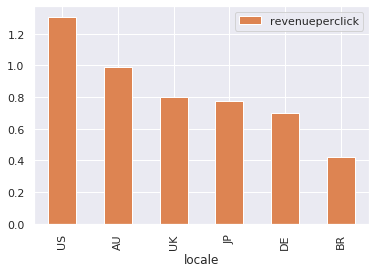

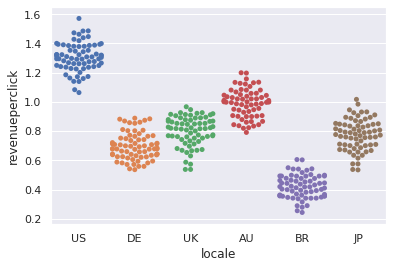

In [16]:
#Bar Plot and BeeSwarm Plot for Test2.csv
print(pd.DataFrame(df_test2.groupby('locale').revenueperclick.mean()).sort_values(by='revenueperclick', ascending=False).rename(columns={'revenueperclick':'Avg RevenuePerClick'}))
print('')
print("Global:      ", df_test2.revenueperclick.mean())
pd.DataFrame(df_test2.groupby('locale').revenueperclick.mean()).sort_values(by='revenueperclick', ascending=False).plot(kind='bar', color='C1')
plt.figure()
ax = sns.swarmplot(x="locale", y="revenueperclick", data=df_test2)
plt.show()

# Do you find any trend in the data?

#### As clickspervisit and bookingsperclick are chosen to be Key Metrics, we'll analyse the trend using these two Metrics 


## For Test1.csv

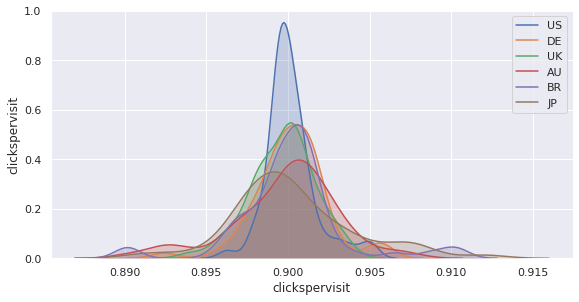

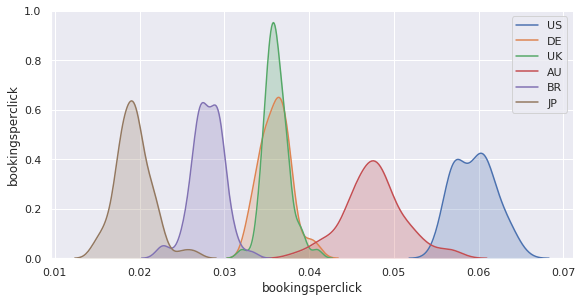

In [17]:
# Density Plot for Comparing the distribution
g = sns.pairplot(df_test1, hue="locale", vars=['clickspervisit'], height=4, aspect=2);
g._legend.remove()
legend(df_test1.locale.unique());
g =sns.pairplot(df_test1, hue="locale", vars=['bookingsperclick'], height=4, aspect=2, hue_order=["US", "DE","UK","AU","BR","JP"]);
g._legend.remove();
legend(df_test1.locale.unique());

* Density Plot to visualise the Destribution of data

* Data is fairly a Normal Distribution both for clickspervisit and bookingsperclick

#### Seasonal plot of daily clickspervisit globally

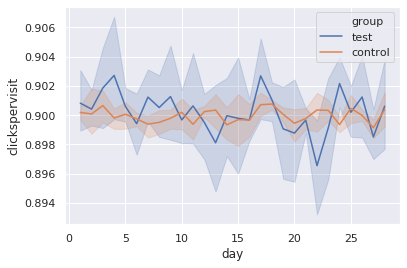

In [18]:
sns.lineplot(x="day", y="clickspervisit", hue ='group', data=df_test1);

#### Seasonal plot of daily clickspervisit Platform-wise(locale)

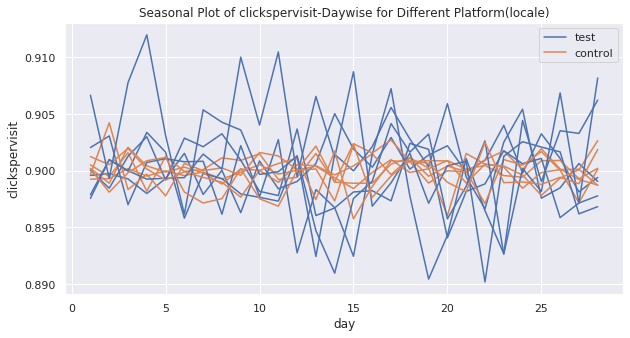

In [19]:
plt.figure(figsize=(10,5))
for i in df_test1.locale.unique(): 
    title("Seasonal Plot of clickspervisit-Daywise for Different Platform(locale)")
    g = sns.lineplot(x="day", y="clickspervisit", hue ='group', data=df_test1.query("locale ==@i"))
    legend(['test','control'])    

Plotting Separately for Each Platform


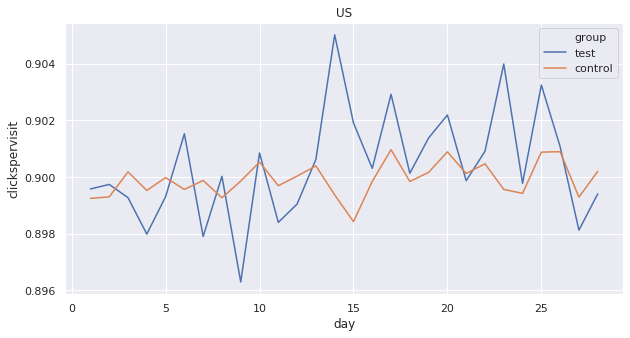

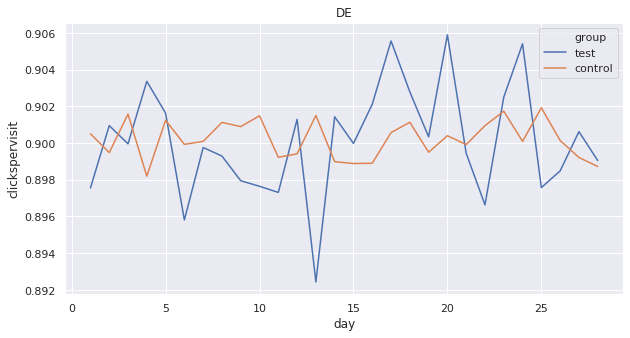

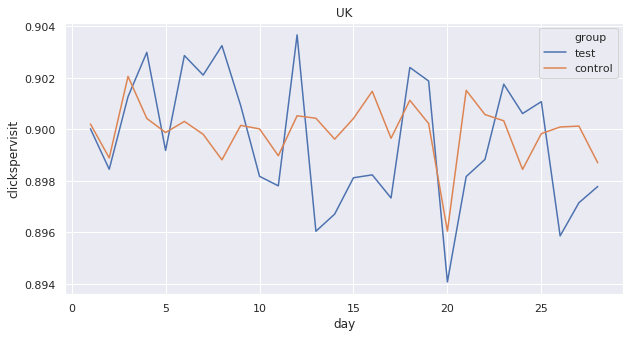

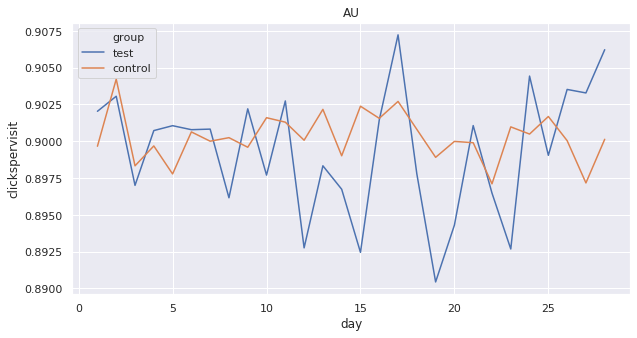

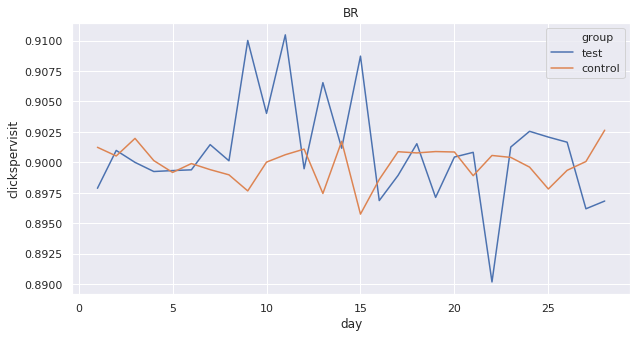

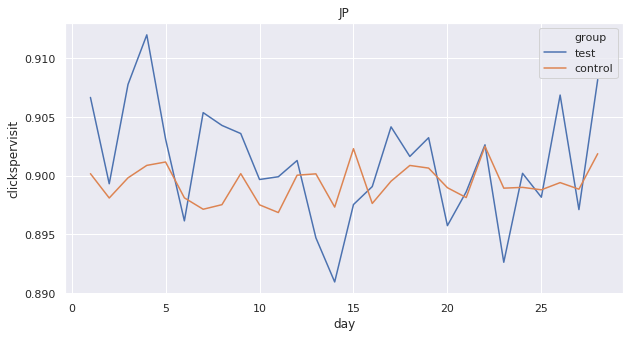

In [20]:
print('Plotting Separately for Each Platform')    
for i in df_test1.locale.unique():
    plt.figure(figsize=(10,5))
    title(i)
    g = sns.lineplot(x="day", y="clickspervisit", hue ='group', data=df_test1.query("locale ==@i"))

* For US Platform test group clickspervisit started increasing after 12th days, as visitors might took some time to overcome old habits of viewing previous Control Group version 
* For DE Platform test group clickspervisit started increasing after 14th days, as visitors might took some time to overcome old habits of viewing previous Control Group version 
* For UK there's no significant Trend
* For AU users prefer control group than test group
* For BR clickspervisit increased after 1st week for test group but dropped to same level as control group after 2nd week
* For JP Users preferred test group slightly more than control group


#### Seasonal plot of daily bookingsperclick globally

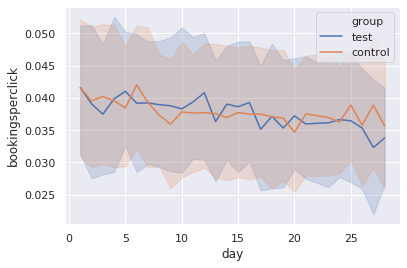

In [21]:
sns.lineplot(x="day", y="bookingsperclick", hue ='group', data=df_test1);

#### Seasonal plot of daily bookingsperclick Platform-wise(locale)

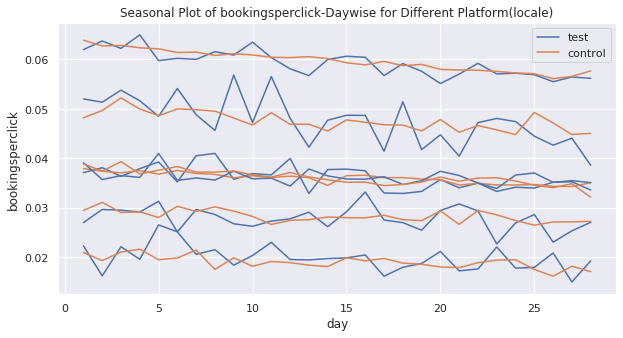

In [22]:
plt.figure(figsize=(10,5))
for i in df_test1.locale.unique():
    title("Seasonal Plot of bookingsperclick-Daywise for Different Platform(locale)")
    g = sns.lineplot(x="day", y="bookingsperclick", hue ='group', data=df_test1.query("locale ==@i"))
    legend(['test','control'])

Plotting Separately for Each Platform


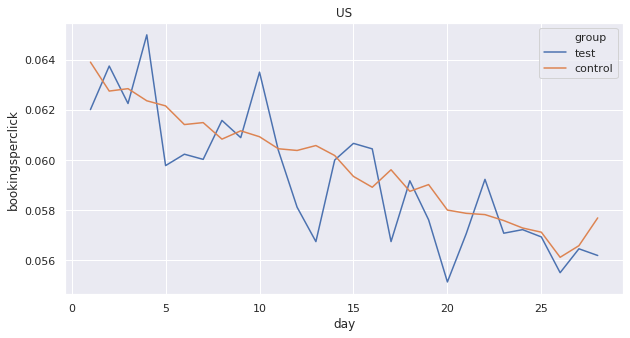

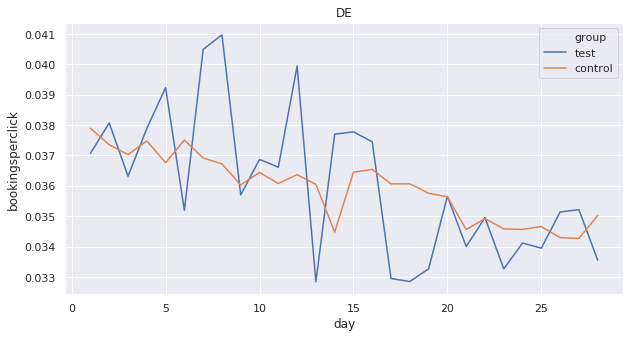

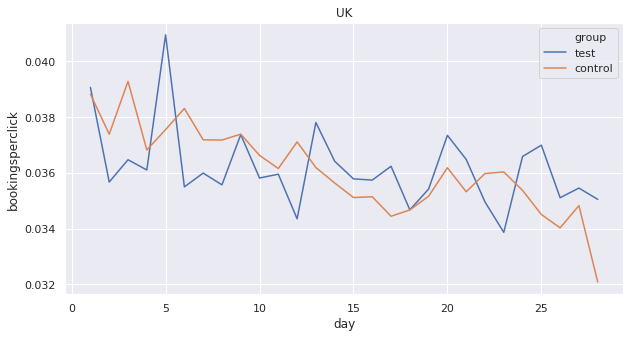

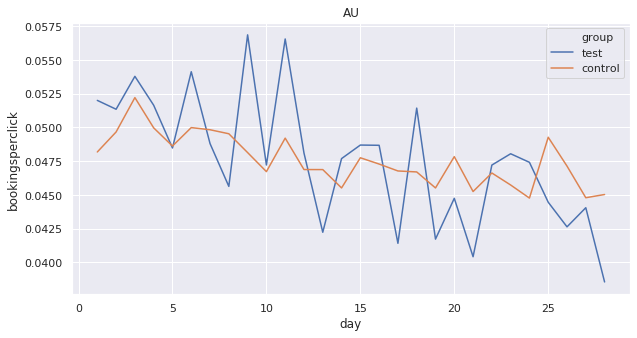

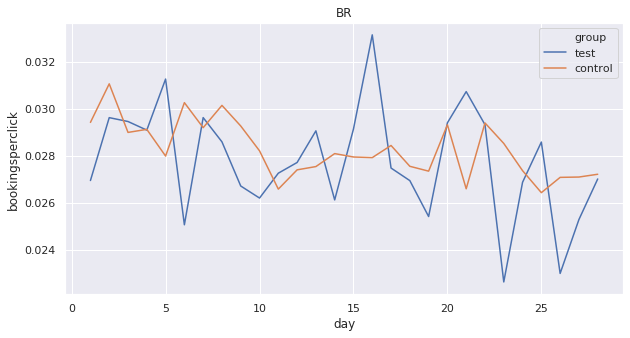

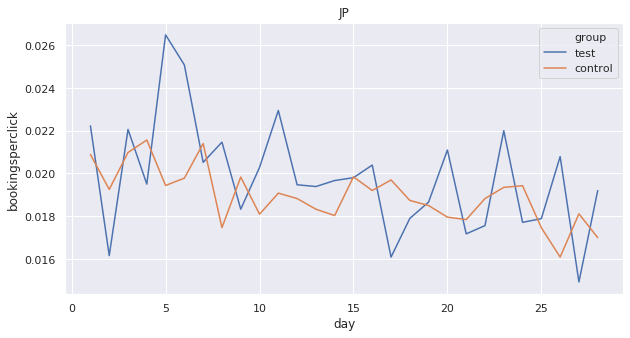

In [23]:
print('Plotting Separately for Each Platform')
for i in df_test1.locale.unique():
    plt.figure(figsize=(10,5))
    title(i)
    g = sns.lineplot(x="day", y="bookingsperclick", hue ='group', data=df_test1.query("locale ==@i"))

* Bookingsperclick for both Test and Control Groups follow almost the same Trend
* Bookingsperclick decreases as the number of days increase over all the platforms
* It shows click to booking conversion decreases over time. 

## For Test2.csv

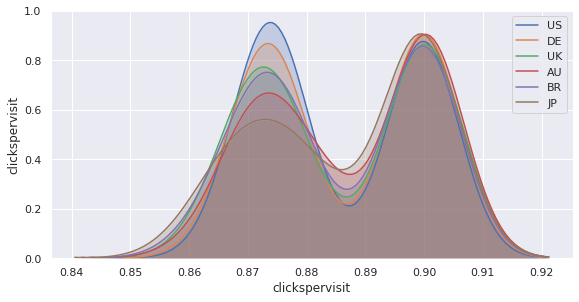

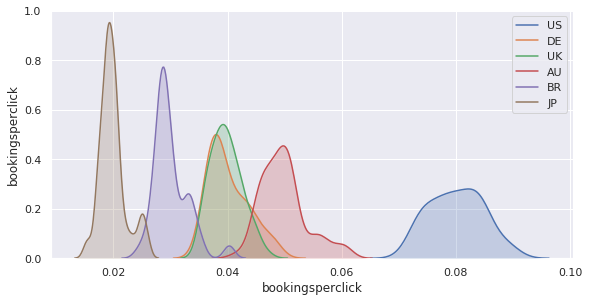

In [24]:
# Density Plot for Comparing the distribution
g = sns.pairplot(df_test2, hue="locale", vars=['clickspervisit'], height=4, aspect=2);
g._legend.remove()
legend(df_test2.locale.unique());
g =sns.pairplot(df_test2, hue="locale", vars=['bookingsperclick'], height=4, aspect=2, hue_order=["US", "DE","UK","AU","BR","JP"]);
g._legend.remove();
legend(df_test2.locale.unique());

* Density Plot to visualise the Destribution of data
* Data is fairly a Normal Distribution both for clickspervisit and bookingsperclick
* Two bell curve in clickspervisit plot corresponds to Test and control group as they have different mean


#### Seasonal plot of daily clickspervisit globally

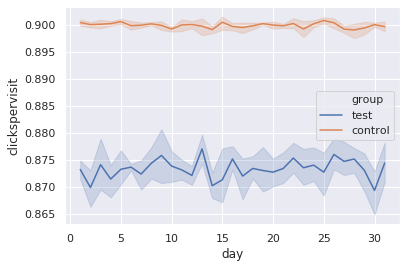

In [25]:
sns.lineplot(x="day", y="clickspervisit", hue ='group', data=df_test2);

#### Seasonal plot of daily clickspervisit Platform-wise(locale)

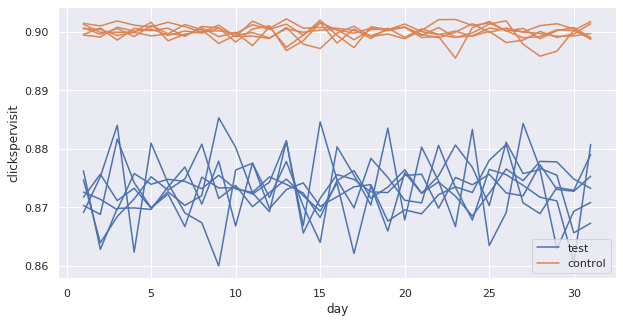

In [26]:
plt.figure(figsize=(10,5))
for i in df_test2.locale.unique():  
    g = sns.lineplot(x="day", y="clickspervisit", hue ='group', data=df_test2.query("locale ==@i"))
    legend(['test','control'])

Plotting Separately for Each Platform


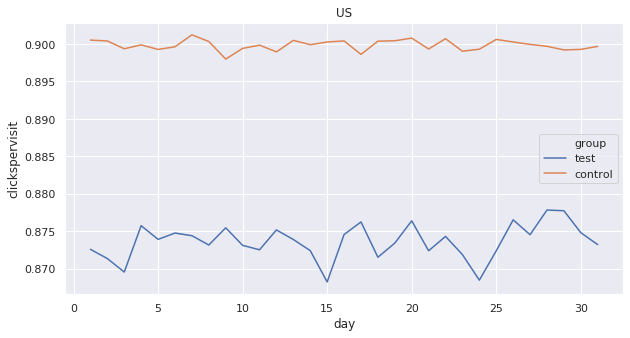

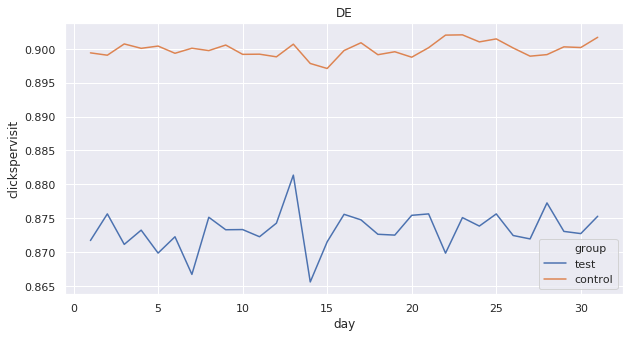

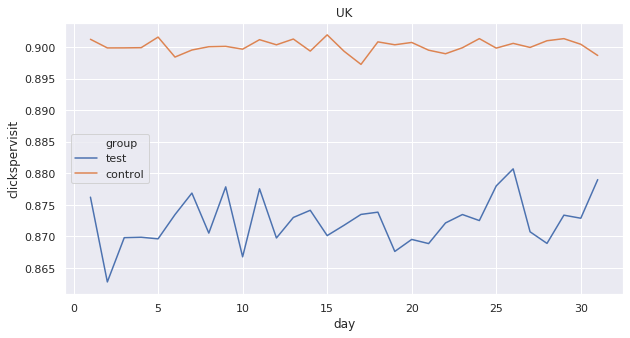

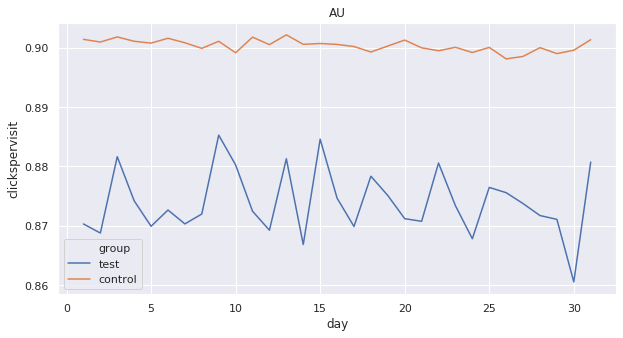

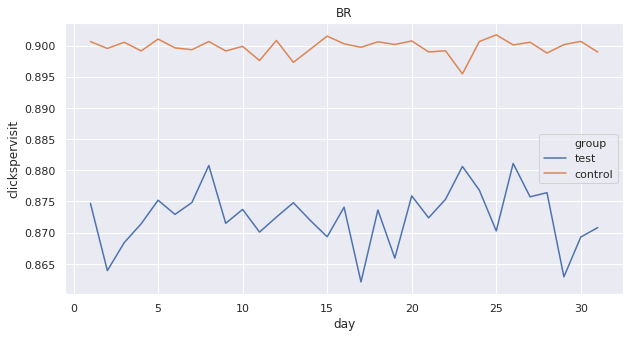

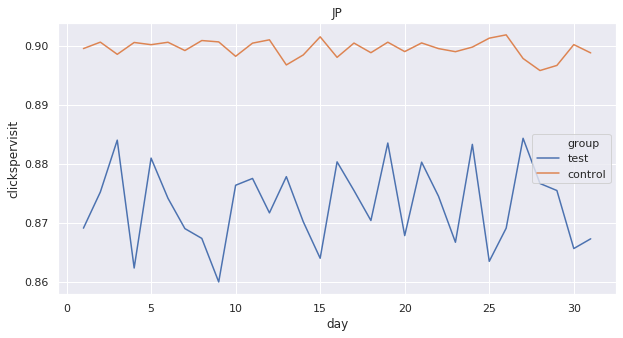

In [27]:
print('Plotting Separately for Each Platform')
for i in df_test2.locale.unique():
    plt.figure(figsize=(10,5))
    title(i)
    g = sns.lineplot(x="day", y="clickspervisit", hue ='group', data=df_test2.query("locale ==@i"))

* For every platform, Control Group clearly has more clickspervisit rate 
* If clickspervisit is the only Key Metric then Test group can be rejected. (Hypothesis Testing performed in later parts)

#### Seasonal plot of daily bookingsperclick globally

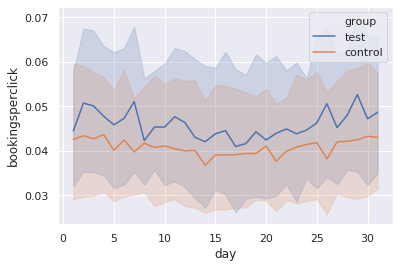

In [28]:
sns.lineplot(x="day", y="bookingsperclick", hue ='group', data=df_test2);

#### Seasonal plot of daily bookingsperclick Platform-wise(locale)

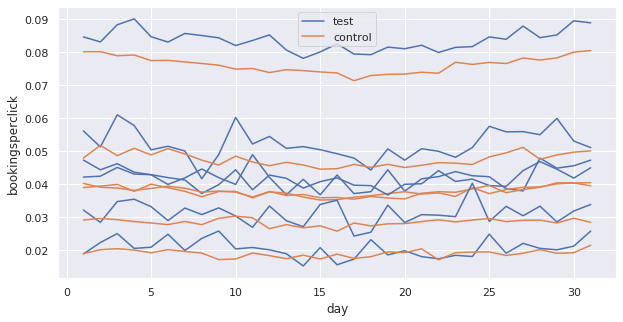

In [29]:
plt.figure(figsize=(10,5))
for i in df_test2.locale.unique():  
    g = sns.lineplot(x="day", y="bookingsperclick", hue ='group', data=df_test2.query("locale ==@i"))
    legend(['test','control'])

Plotting Separately for Each Platform


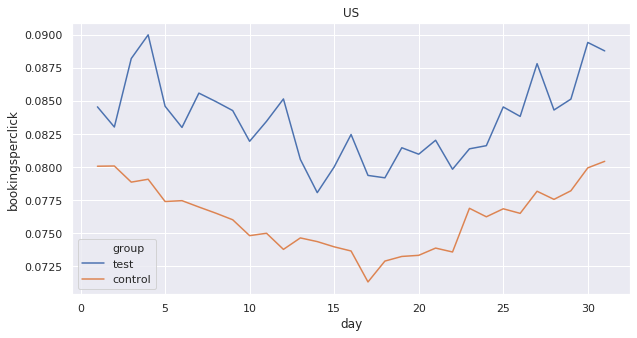

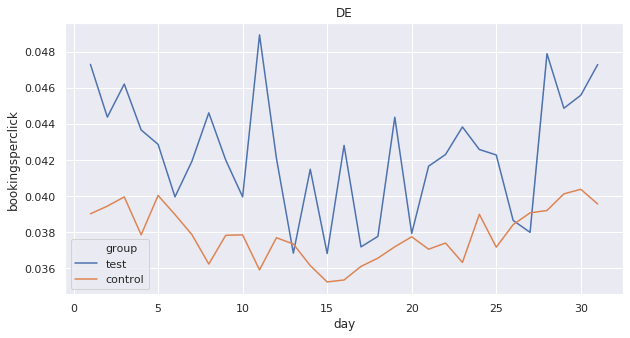

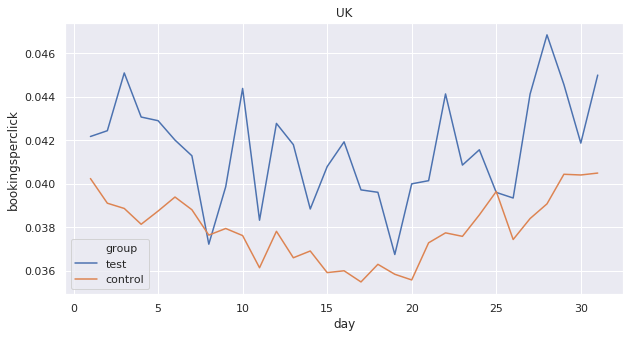

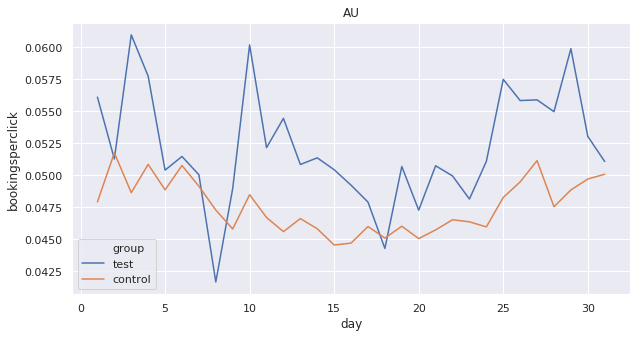

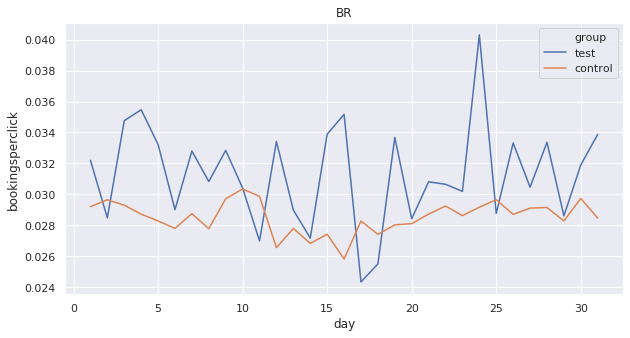

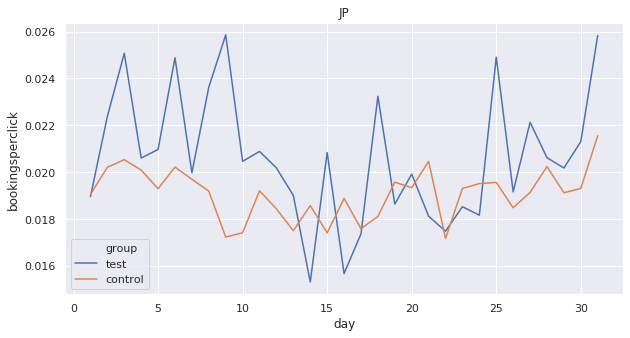

In [30]:
print('Plotting Separately for Each Platform')
for i in df_test2.locale.unique():
    plt.figure(figsize=(10,5))
    title(i)
    g = sns.lineplot(x="day", y="bookingsperclick", hue ='group', data=df_test2.query("locale ==@i"))

* It shows clear distinction that for each platform, test group has better bookingsperclick ratio. It means visitors coming through Test Group are more likely to complete the reservation at advertised Hotel's website i.e make a booking 

## Which relation do you think exists between clicks and bookings? And what about visits and bookings? Which one would you consider as more valuable KPI?

##### Relation between clicks and bookings

Correlation:  0.9694951028542049


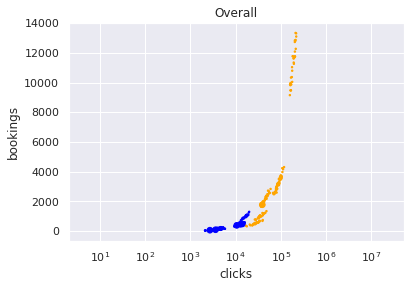

In [31]:
#Scatter Plot between Clicks and bookings
data = df_test1.query('(group == "test") or (group == "control")')
size = np.where(data.clicks % 100== 0,32,2)
color = np.where(data.group == 'test', 'blue', 'orange')
correlation = df_test1.clicks.corr(df_test1.bookings)
print('Correlation: ',correlation)
ax = data.plot.scatter("clicks", "bookings", logx=True, s= size, c=color, title ="Overall",legend=True)
plt.show()

##### There's a strong positive correlation between clicks and bookings. As clicks increases, booking increases.

Correlation for Control Group :  0.9766534496551136
Correlation for Test Group:  0.9319742306093298


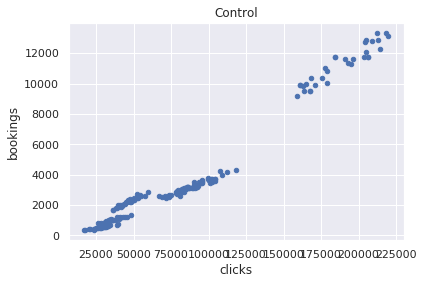

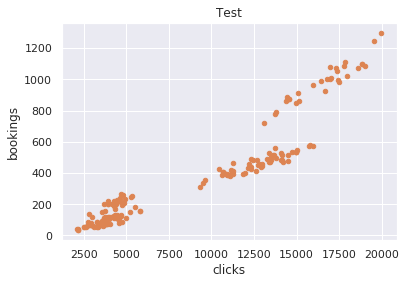

In [32]:
#Scatter Plot between Clicks and bookings wrt Control and Test Group
correlation_control = df_test1.query('group == "control"').clicks.corr(df_test1.query('group=="control"').bookings)
print('Correlation for Control Group : ',correlation_control)
correlation_test = df_test1.query('group == "test"').clicks.corr(df_test1.query('group=="test"').bookings)
print('Correlation for Test Group: ',correlation_test)
df_test1.query('group=="control"').plot.scatter("clicks", "bookings", title = 'Control', c=['C0'])
df_test1.query('group=="test"').plot.scatter("clicks", "bookings", title = 'Test', c=['C1'])
plt.show()

##### Relation between visit and bookings.

Correlation:  0.9695294655460583


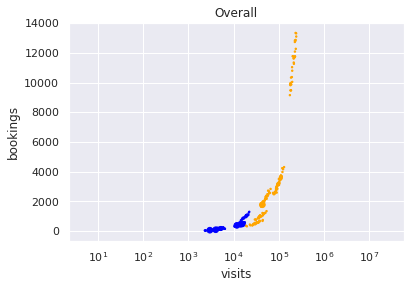

In [33]:
#Scatter Plot between Visits and bookings 
data = df_test1.query('(group == "test") or (group == "control")')
size = np.where(data.clicks % 100== 0,32,2)
color = np.where(data.group == 'test', 'blue', 'orange')
correlation = df_test1.visits.corr(df_test1.bookings)
print('Correlation: ',correlation)
data.plot.scatter("visits", "bookings", logx=True, s= size, c=color, title ="Overall", legend=True)
plt.show()

##### There's a strong positive correlation between visits and bookings. With Increase in visits, number of booking also increases.

Correlation for Control Group :  0.9767104317693208
Correlation for Test Group:  0.93191065091505


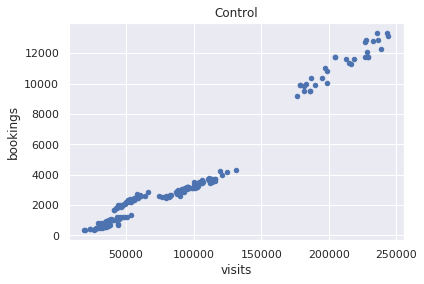

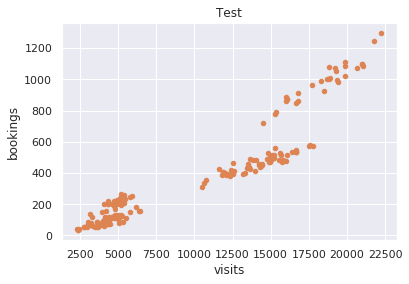

In [34]:
#Scatter Plot between visits and bookings wrt Control and Test Group
correlation_control = df_test1.query('group == "control"').visits.corr(df_test1.query('group=="control"').bookings)
print('Correlation for Control Group : ',correlation_control)
correlation_test = df_test1.query('group == "test"').visits.corr(df_test1.query('group=="test"').bookings)
print('Correlation for Test Group: ',correlation_test)
df_test1.query('group=="control"').plot.scatter("visits", "bookings", title = 'Control', color=['C0'])
df_test1.query('group=="test"').plot.scatter("visits", "bookings", title = 'Test', color=['C1'])
plt.show()

#### Both (clicks and bookings) & (visits and bookings) are strongely correlated. The reason is because of strong positive correlation between clicks and visits. 
* More valuable KPI would be booking wrt clicks as visits converted into clicks generate revenue for Trivago and more clicks will increase the chances of more booking which in turn influences Trivago's CPC

## A/B testing Analysis 

### Intuition about Key Metrics

* **Clickspervisit**: For tracking number of clicks per visitor (Key Metric). It shows how interesting Trivago's website looks to visitors. As Trivago is CPC based i.e it generates revenue based on pay-per-click advertising. So greater clickspervisit means more revenue. 
* Trivago's revenue comes from a cost per click (CPC) model. The CPC reflects the quality of the traffic that Trivago send to its partners, as our partner websites bid more for higher quality traffic (traffic that is more likely to book).
* For overall marketplace, which in practice is when a user makes a booking on a partner site. This is business relevant for Trivago, as understanding traffic that has made a booking gives us information on the quality of traffic Trivago is providing, which in turn influences thier CPC. It is tracked using **bookingsperclick**
 


## Test1 (Conducted in February' 2019)

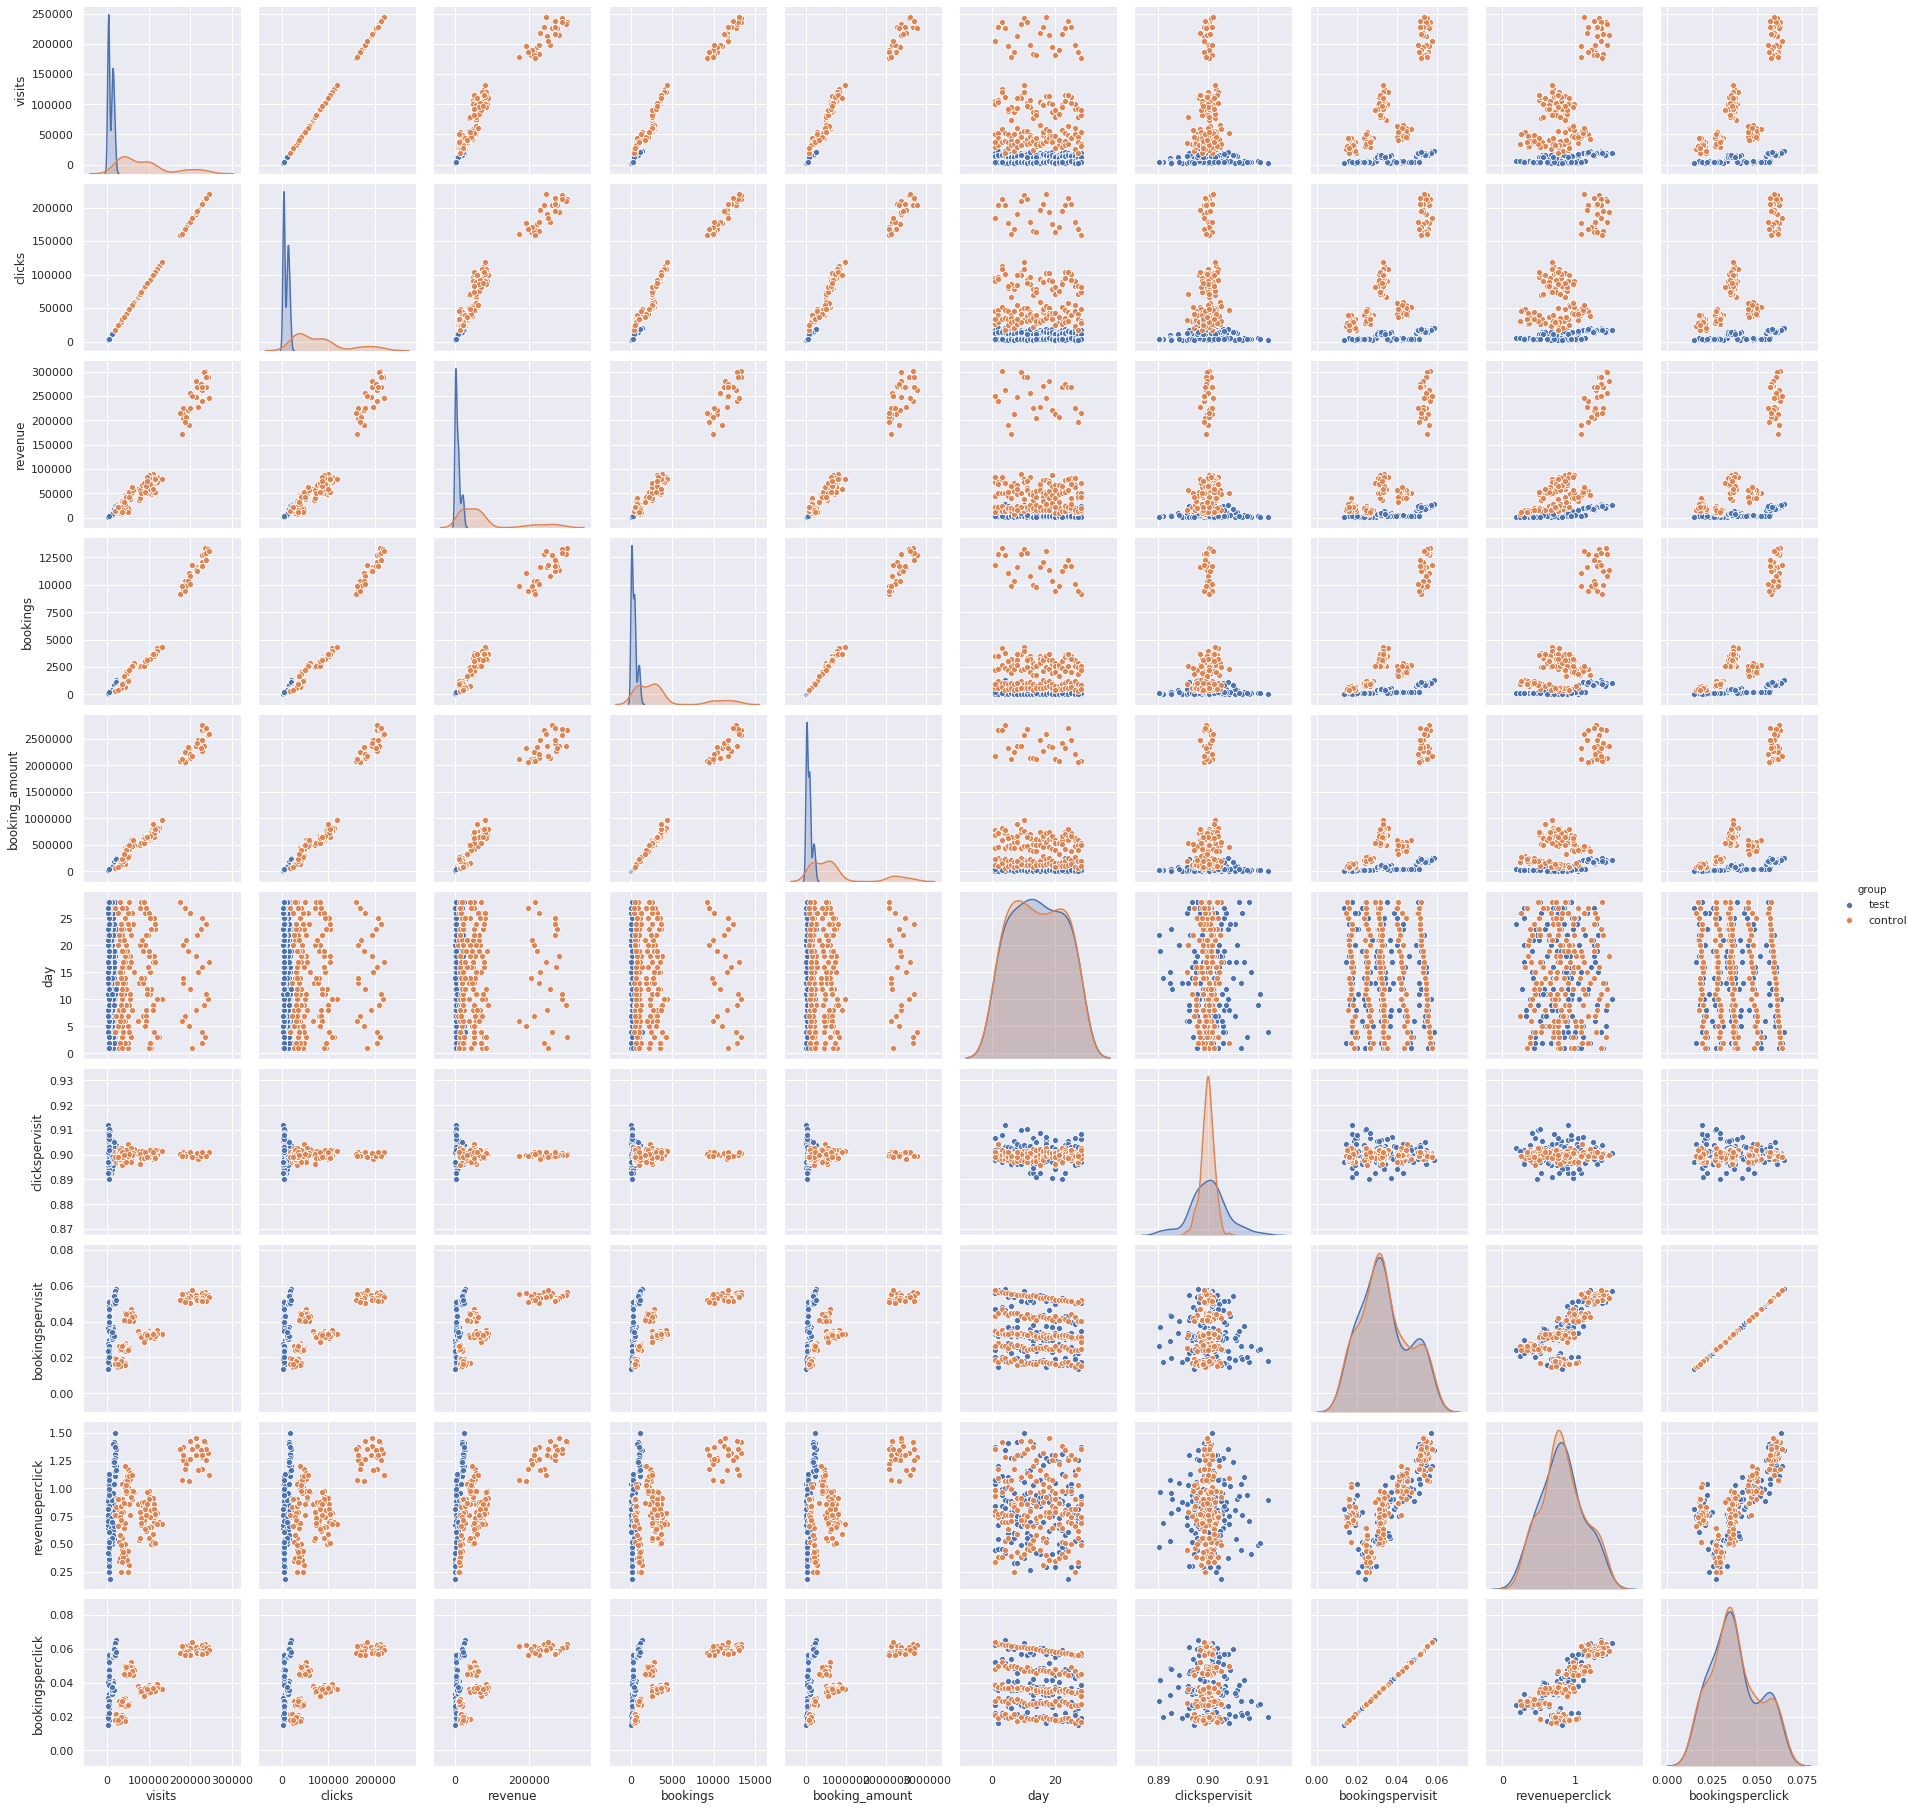

In [35]:
#Paitplot show pairwise relation between all the variables in the dataframe
sns.pairplot(df_test1, hue="group");

#### On the basis of ClicksperVisit

group   AvgClicksPerVisit for Control  AvgClicksPerVisit for test
locale                                                           
AU                           0.900275                    0.899464
BR                           0.899907                    0.900433
DE                           0.900314                    0.900073
JP                           0.899385                    0.901177
UK                           0.899891                    0.899466
US                           0.899898                    0.900495


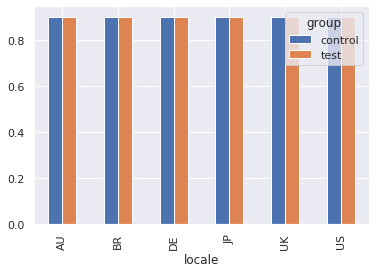

In [36]:
#Bar plot to find differnce between AvgClicksPerVisit for Control and Test Group
print(df_test1.groupby(['locale','group']).clickspervisit.mean().unstack().rename(columns={'control':'AvgClicksPerVisit for Control','test':'AvgClicksPerVisit for test'}))
df_test1.groupby(['locale','group']).clickspervisit.mean().unstack().plot(kind='bar')
plt.show()

##### Comparing clickspervisit's Distribuition between Control and Test group

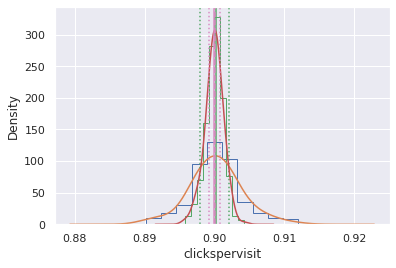

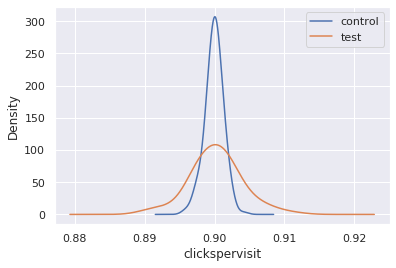

In [37]:
# for plotting histogram
df_test1.query('group=="test"').clickspervisit.plot(kind='hist', histtype='step', density=True)
# Adding Density plot
df_test1.query('group=="test"').clickspervisit.plot.density(bw_method=0.5)
# for plotting Mean line
plt.axvline(df_test1.query('group=="test"').clickspervisit.mean(), c='C2')
# for plotting Median line
plt.axvline(df_test1.query('group=="test"').clickspervisit.median(), c='C2', linestyle= '--')
# for plotting 1st quantile line
plt.axvline(df_test1.query('group=="test"').clickspervisit.quantile(0.25), c='C2', linestyle= ':')
# for plotting 3rd quantile line
plt.axvline(df_test1.query('group=="test"').clickspervisit.quantile(0.75), c='C2', linestyle= ':');
df_test1.query('group=="control"').clickspervisit.plot(kind='hist', histtype='step', density=True)
df_test1.query('group=="control"').clickspervisit.plot.density(bw_method=0.5)
plt.axvline(df_test1.query('group=="control"').clickspervisit.mean(), c='C6')
plt.axvline(df_test1.query('group=="control"').clickspervisit.median(), c='C6', linestyle= '--')
plt.axvline(df_test1.query('group=="control"').clickspervisit.quantile(0.25), c='C6', linestyle= ':')
plt.axvline(df_test1.query('group=="control"').clickspervisit.quantile(0.75), c='C6', linestyle= ':')
xlabel("clickspervisit");
plt.figure()
df_test1.query('group=="control"').clickspervisit.plot.density(bw_method=0.5)
df_test1.query('group=="test"').clickspervisit.plot.density(bw_method=0.5)
xlabel("clickspervisit")
legend(['control', 'test']);

In [38]:
#Calculating average Clickspervisit for Control and Test Group Globally
x = df_test1.groupby("group").clickspervisit.mean()
print(x.head())

print('Average Difference between Control and Test Group', x['control']- x['test'])

group
control    0.899946
test       0.900194
Name: clickspervisit, dtype: float64
Average Difference between Control and Test Group -0.00024780899541620993


* There is no significant difference between the avg clickspervisit globally between Control and Test Group.
* Proving the statement with Hypothesis Testing and statistical evidence for entire Population.
* **Hypothesis Testing** is done to help determine if the variation between or among groups of data is due to true variation or if it is the result of sample variation. With the help of sample data we form assumptions about the population, then we have to test our assumptions statistically. This is called Hypothesis testing.
* For Hypothesis Testing we use : Two Sample T-test

## Two-sample T-test
The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test


In [39]:
def eval_test(p_value):
    if p_value < 0.05:
        return('We reject H0 and accept H1')
    else:
        return('We accept H0 and reject H1')

#### Hypothesis Testing
* **H0(Null Hypothesis)**: There is no significant difference between average clickspervisit of control and test group distribution Globally
* **H1(Alternate Hypothesis)**: There is significant difference average clickspervisit of control and test group distribution Globally
* We consider H0 to be true. If **P-value or Significance value** <0.05, then we'll reject our H0 and accept H1 otherwise we accept H0 and reject H1

In [40]:
# Conducting testing with H0 and H1 as assumptions
test_results = df_test1.query("group=='test'").clickspervisit
control_results = df_test1.query("group=='control'").clickspervisit
test_result = stats.ttest_ind(test_results, control_results,equal_var=False)
print('P-value result', test_result[1])
print(eval_test(test_result[1]))


P-value result 0.4003755536048065
We accept H0 and reject H1


* Hence we can conclude that there's no significant difference between avg clickspervisit of test and control groups

#### As Trivago have different **platform**(Country Specific) for each country, we now compare Control and Test Groups for each country on the basis of clickpervisit

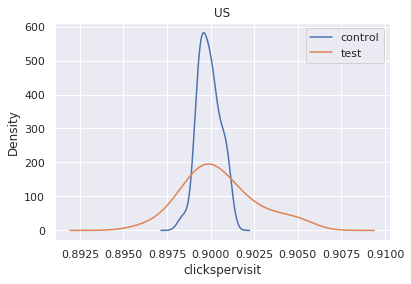

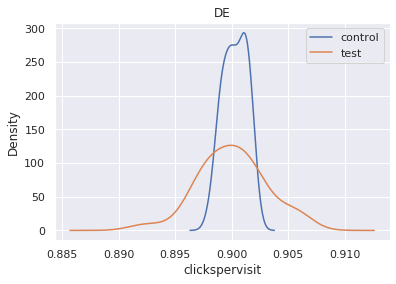

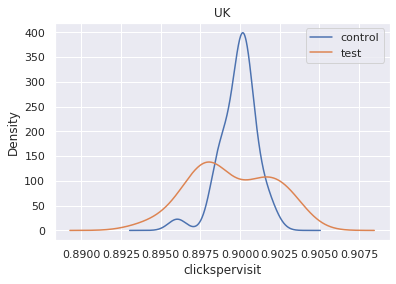

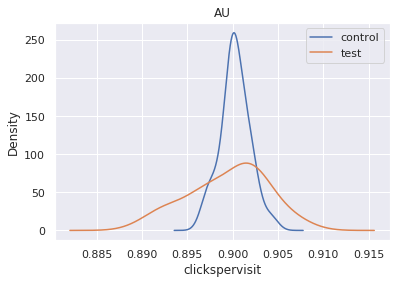

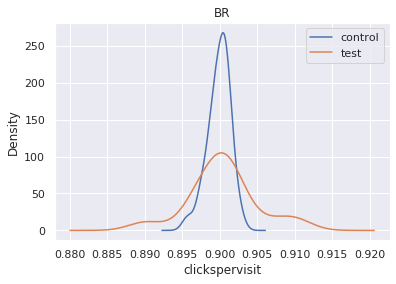

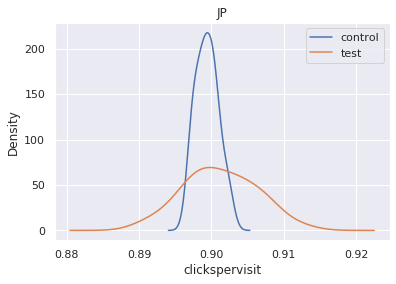

In [41]:
for i in df_test1.locale.unique():
    plt.figure()
    df_test1.query('group=="control" and locale==@i').clickspervisit.plot.density(bw_method=0.5)
    df_test1.query('group=="test" and locale==@i').clickspervisit.plot.density(bw_method=0.5)
    title(i)
    xlabel("clickspervisit")
    legend(['control', 'test']);

* Observation: There's no such significant difference between the avg of the two groups. 
* Proving it by Hypothesis testing 

In [42]:
avg_clickpervisit = df_test1.groupby(['locale','group']).clickspervisit.mean().unstack().rename(columns={'control':'Avg ClicksPerVisit for Control','test':'Avg ClicksPerVisit for Test'})
avg_clickpervisit

group   Avg ClicksPerVisit for Control  Avg ClicksPerVisit for Test
locale                                                             
AU                            0.900275                     0.899464
BR                            0.899907                     0.900433
DE                            0.900314                     0.900073
JP                            0.899385                     0.901177
UK                            0.899891                     0.899466
US                            0.899898                     0.900495

In [43]:
avg_clickpervisit['%change'] = ((avg_clickpervisit['Avg ClicksPerVisit for Control']-avg_clickpervisit['Avg ClicksPerVisit for Test'])/avg_clickpervisit['Avg ClicksPerVisit for Control'])*100
avg_clickpervisit

group   Avg ClicksPerVisit for Control  Avg ClicksPerVisit for Test   %change
locale                                                                       
AU                            0.900275                     0.899464  0.090077
BR                            0.899907                     0.900433 -0.058383
DE                            0.900314                     0.900073  0.026687
JP                            0.899385                     0.901177 -0.199260
UK                            0.899891                     0.899466  0.047186
US                            0.899898                     0.900495 -0.066348

#### Hypothesis Testing
* **H0(Null Hypothesis)**: There is no significant difference between average clickspervisit of control and test group distribution per platform
* **H1(Alternate Hypothesis)**: There is significant difference average clickspervisit of control and test group distribution per platform
* We consider H0 to be true. If **P-value or Significance value** <0.05, then we'll reject our H0 and accept H1 otherwise we accept H0 and reject H1

In [44]:
for i in df_test1.locale.unique():
    test_results = df_test1.query("group=='test' and locale==@i").clickspervisit
    control_results = df_test1.query("group=='control'and locale==@i").clickspervisit
    test_result = stats.ttest_ind(test_results, control_results, equal_var=False)
    print('For Platform ',i,' P-Value:', test_result[1])
    print('For Platform ',i, ':',eval_test(test_result[1])) 

For Platform  US  P-Value: 0.14044577476299466
For Platform  US : We accept H0 and reject H1
For Platform  DE  P-Value: 0.6787782128744364
For Platform  DE : We accept H0 and reject H1
For Platform  UK  P-Value: 0.413054062264385
For Platform  UK : We accept H0 and reject H1
For Platform  AU  P-Value: 0.3440713579777174
For Platform  AU : We accept H0 and reject H1
For Platform  BR  P-Value: 0.5437322567981258
For Platform  BR : We accept H0 and reject H1
For Platform  JP  P-Value: 0.0671910810139855
For Platform  JP : We accept H0 and reject H1


* There's no significant difference between test and control group even platformwise
* Therefore we should analyse the Seasonal data more before making a conclusion

Plotting Separately for Each Platform


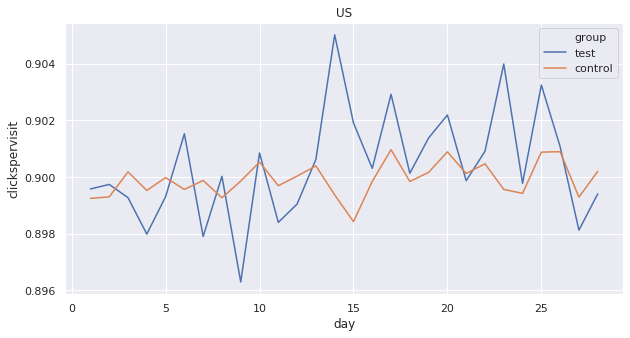

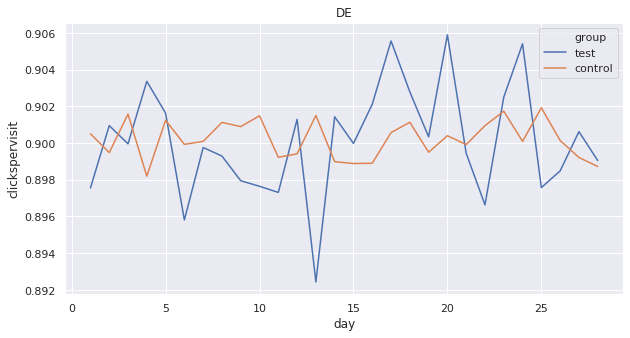

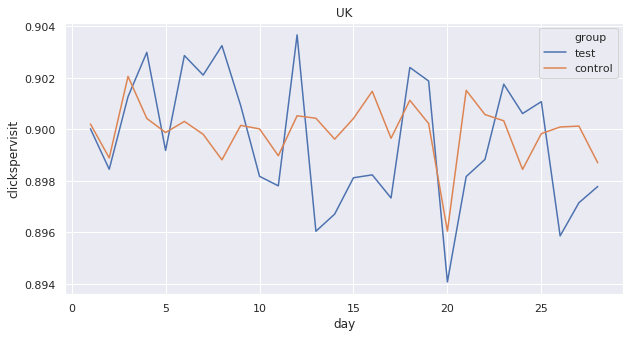

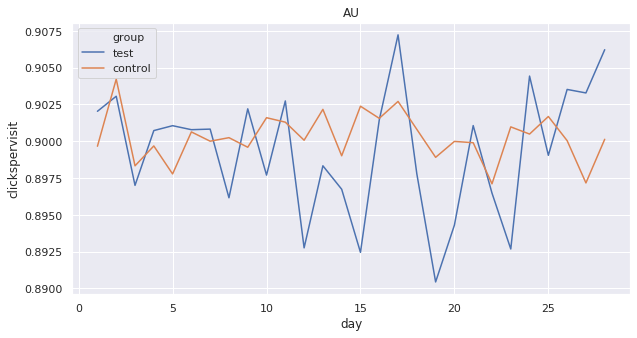

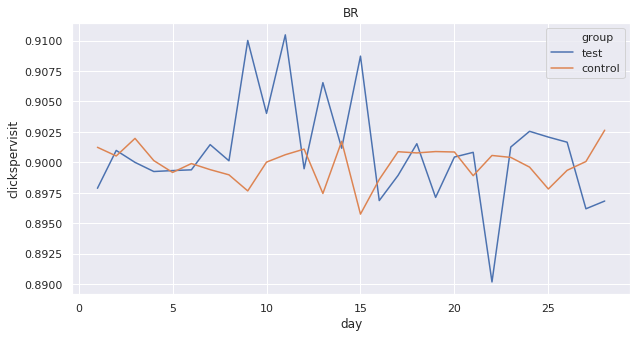

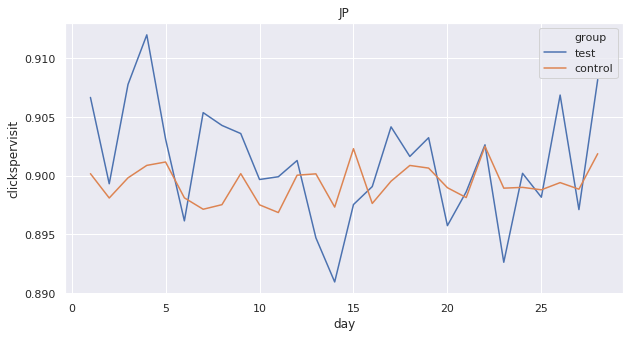

In [45]:
print('Plotting Separately for Each Platform')    
for i in df_test1.locale.unique():
    plt.figure(figsize=(10,5))
    title(i)
    g = sns.lineplot(x="day", y="clickspervisit", hue ='group', data=df_test1.query("locale ==@i"))

* As in platform like US and DE test's group clickpervisit started increasing after 2nd week and follows almost the same trend as Control group for other platforms. 
* Therefore we should **Run the test for a longer period of time** tohave better intuition about the Test Group

#### Analysis on the basis of Bookingsperclick

group   AvgBookingsPerClick for Control  AvgBookingsPerClick for test
locale                                                               
AU                             0.047480                      0.047787
BR                             0.028362                      0.027739
DE                             0.036002                      0.036079
JP                             0.018954                      0.019719
UK                             0.036099                      0.036159
US                             0.059748                      0.059253


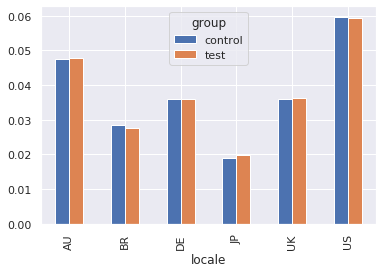

In [75]:
#Bar plot to find differnce between AvgClicksPerVisit for Control and Test Group
print(df_test1.groupby(['locale','group']).bookingsperclick.mean().unstack().rename(columns={'control':'AvgBookingsPerClick for Control','test':'AvgBookingsPerClick for test'}))
df_test1.groupby(['locale','group']).bookingsperclick.mean().unstack().plot(kind='bar')
plt.show()

##### Comparing bookingsperclick's Distribuition between Control and Test group

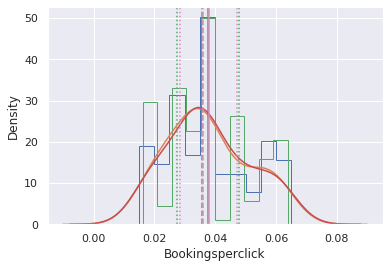

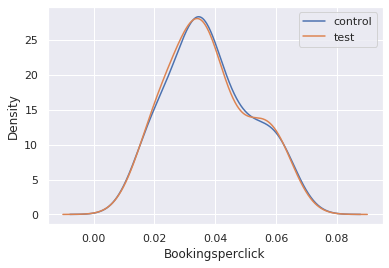

In [47]:
# for plotting histogram
df_test1.query('group=="test"').bookingsperclick.plot(kind='hist', histtype='step', density=True)
# Adding Density plot 
df_test1.query('group=="test"').bookingsperclick.plot.density(bw_method=0.5)
# Plotting line of Mean
plt.axvline(df_test1.query('group=="test"').bookingsperclick.mean(), c='C2')
# Plotting line of Median
plt.axvline(df_test1.query('group=="test"').bookingsperclick.median(), c='C2', linestyle= '--')
# Plotting line of 1st Quantile
plt.axvline(df_test1.query('group=="test"').bookingsperclick.quantile(0.25), c='C2', linestyle= ':')
# Plotting line of 2nd Quantile
plt.axvline(df_test1.query('group=="test"').bookingsperclick.quantile(0.75), c='C2', linestyle= ':');
df_test1.query('group=="control"').bookingsperclick.plot(kind='hist', histtype='step', density=True)
df_test1.query('group=="control"').bookingsperclick.plot.density(bw_method=0.5)
plt.axvline(df_test1.query('group=="control"').bookingsperclick.mean(), c='C6')
plt.axvline(df_test1.query('group=="control"').bookingsperclick.median(), c='C6', linestyle= '--')
plt.axvline(df_test1.query('group=="control"').bookingsperclick.quantile(0.25), c='C6', linestyle= ':')
plt.axvline(df_test1.query('group=="control"').bookingsperclick.quantile(0.75), c='C6', linestyle= ':')
xlabel("Bookingsperclick");
plt.figure()
df_test1.query('group=="control"').bookingsperclick.plot.density(bw_method=0.5)
df_test1.query('group=="test"').bookingsperclick.plot.density(bw_method=0.5)
xlabel("Bookingsperclick")
legend(['control', 'test']);

In [48]:
#Calculating average Bookingsperclick for Control and Test Group Globally
x = df_test1.groupby("group").bookingsperclick.mean()
print(x.head())
print('Average Difference between Control and Test Group', x['control']- x['test'])

group
control    0.037932
test       0.037686
Name: bookingsperclick, dtype: float64
Average Difference between Control and Test Group 0.0002454657794804943


#### Hypothesis Testing
* **H0(Null Hypothesis)**: There is no significant difference between average bookingsperclick of control and test group distribution Globally
* **H1(Alternate Hypothesis)**: There is significant difference average bookingsperclick of control and test group distribution Globally
* We consider H0 to be true. If **P-value or Significance value** <0.05, then we'll reject our H0 and accept H1 otherwise we accept H0 and reject H1

In [49]:
test_results = df_test1.query("group=='test'").bookingsperclick
control_results = df_test1.query("group=='control'").bookingsperclick
test_result = stats.ttest_ind(test_results, control_results)
print('P-value result', test_result[1])
print(eval_test(test_result[1]))

P-value result 0.8599550824023845
We accept H0 and reject H1


* Hence we can conclude that there's no significant difference between avg bookingsperclick of test and control groups

#### As Trivago have different **platform**(Country Specific) for each country, we now compare Control and Test Groups for each country on the basis of bookingsperclick

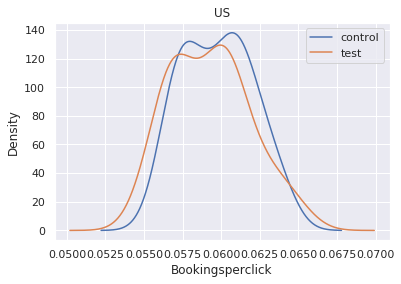

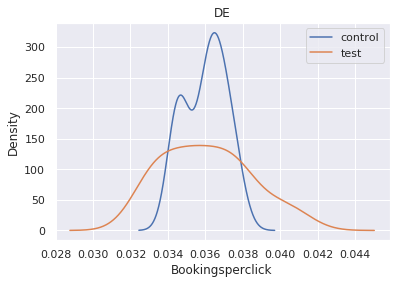

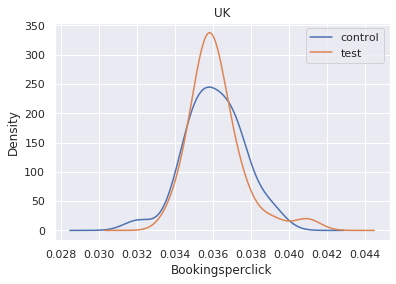

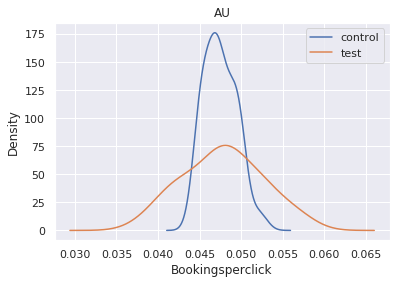

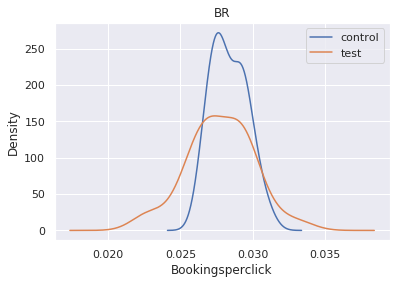

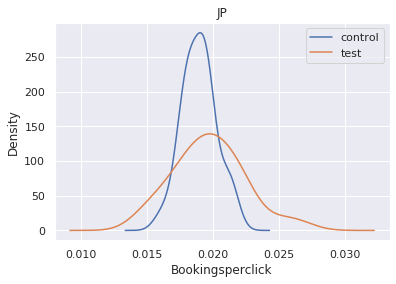

In [50]:
for i in df_test1.locale.unique():
    plt.figure()
    df_test1.query('group=="control" and locale==@i').bookingsperclick.plot.density(bw_method=0.5)
    df_test1.query('group=="test" and locale==@i').bookingsperclick.plot.density(bw_method=0.5)
    title(i)
    xlabel("Bookingsperclick")
    legend(['control', 'test']);

* Observation: There's no such significant difference between the avg of the two groups. 
* Proving it by Hypothesis testing 

In [51]:
avg_bookingsperclick = df_test1.groupby(['locale','group']).bookingsperclick.mean().unstack().rename(columns={'control':'Avg bookingsperclick for Control','test':'Avg bookingsperclick for Test'})
avg_bookingsperclick

group   Avg bookingsperclick for Control  Avg bookingsperclick for Test
locale                                                                 
AU                              0.047480                       0.047787
BR                              0.028362                       0.027739
DE                              0.036002                       0.036079
JP                              0.018954                       0.019719
UK                              0.036099                       0.036159
US                              0.059748                       0.059253

In [52]:
avg_bookingsperclick['%change'] = ((avg_bookingsperclick['Avg bookingsperclick for Control']-avg_bookingsperclick['Avg bookingsperclick for Test'])/avg_bookingsperclick['Avg bookingsperclick for Control'])*100
avg_bookingsperclick

group   Avg bookingsperclick for Control  Avg bookingsperclick for Test  \
locale                                                                    
AU                              0.047480                       0.047787   
BR                              0.028362                       0.027739   
DE                              0.036002                       0.036079   
JP                              0.018954                       0.019719   
UK                              0.036099                       0.036159   
US                              0.059748                       0.059253   

group    %change  
locale            
AU     -0.646500  
BR      2.195832  
DE     -0.212976  
JP     -4.037928  
UK     -0.166024  
US      0.828729

#### Hypothesis Testing
* **H0(Null Hypothesis)**: There is no significant difference between average Bookingsperclick of control and test group distribution per platform
* **H1(Alternate Hypothesis)**: There is significant difference average Bookingsperclick of control and test group distribution per platform
* We consider H0 to be true. If **P-value or Significance value** <0.05, then we'll reject our H0 and accept H1 otherwise we accept H0 and reject H1

In [53]:
for i in df_test1.locale.unique():
    test_results = df_test1.query("group=='test' and locale==@i").bookingsperclick
    control_results = df_test1.query("group=='control'and locale==@i").bookingsperclick
    test_result = stats.ttest_ind(test_results, control_results, equal_var=False)
    print('For Platform ',i,' P-Value:', test_result[1])
    print('For Platform ',i, ':',eval_test(test_result[1])) 

For Platform  US  P-Value: 0.42139417497869913
For Platform  US : We accept H0 and reject H1
For Platform  DE  P-Value: 0.87047162797328
For Platform  DE : We accept H0 and reject H1
For Platform  UK  P-Value: 0.8734418337547051
For Platform  UK : We accept H0 and reject H1
For Platform  AU  P-Value: 0.7481514247556458
For Platform  AU : We accept H0 and reject H1
For Platform  BR  P-Value: 0.18715874346703806
For Platform  BR : We accept H0 and reject H1
For Platform  JP  P-Value: 0.16879317426296017
For Platform  JP : We accept H0 and reject H1


* There's no significant difference between test and control group even platformwise
* Therefore we should analyse the Seasonal data more before making a conclusion 

Plotting Separately for Each Platform


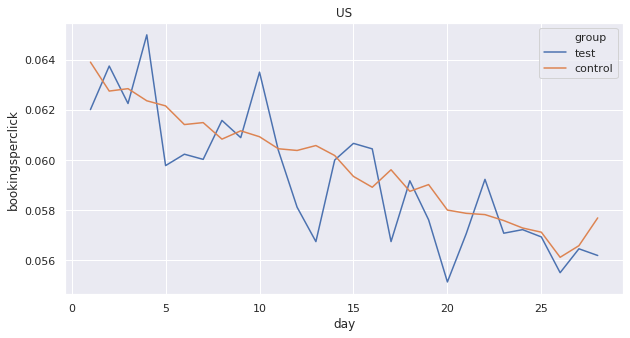

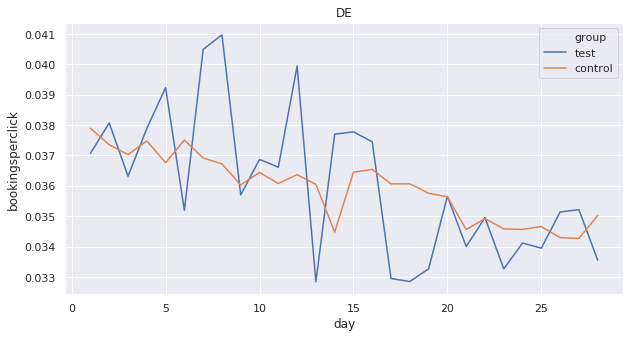

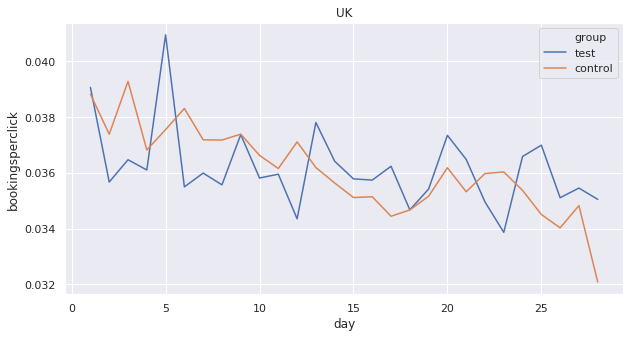

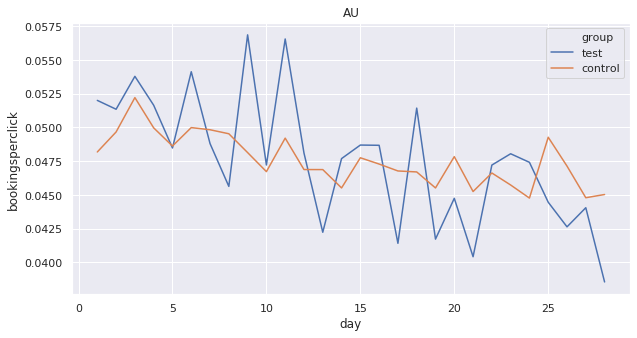

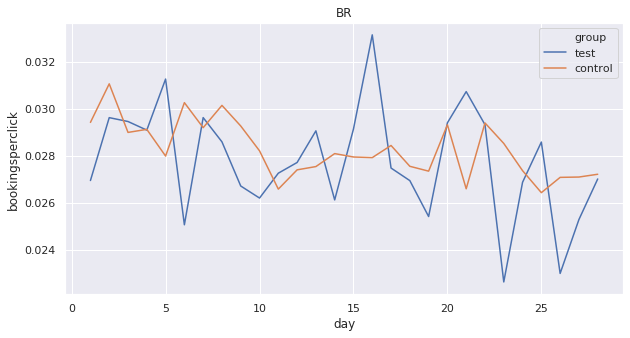

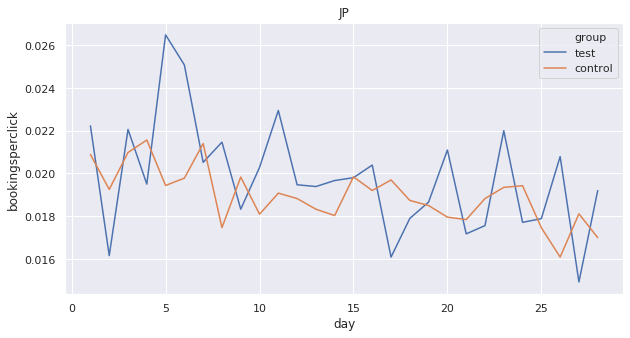

In [54]:
print('Plotting Separately for Each Platform')    
for i in df_test1.locale.unique():
    plt.figure(figsize=(10,5))
    title(i)
    g = sns.lineplot(x="day", y="bookingsperclick", hue ='group', data=df_test1.query("locale ==@i"))

* According to analysis they both almost follow the same Trend. If bookingperclick is more valuable to Trivago then it should **Run the test for a longer period of time**

## A/B testing Analysis for Test2 (Conducted in May' 2019)

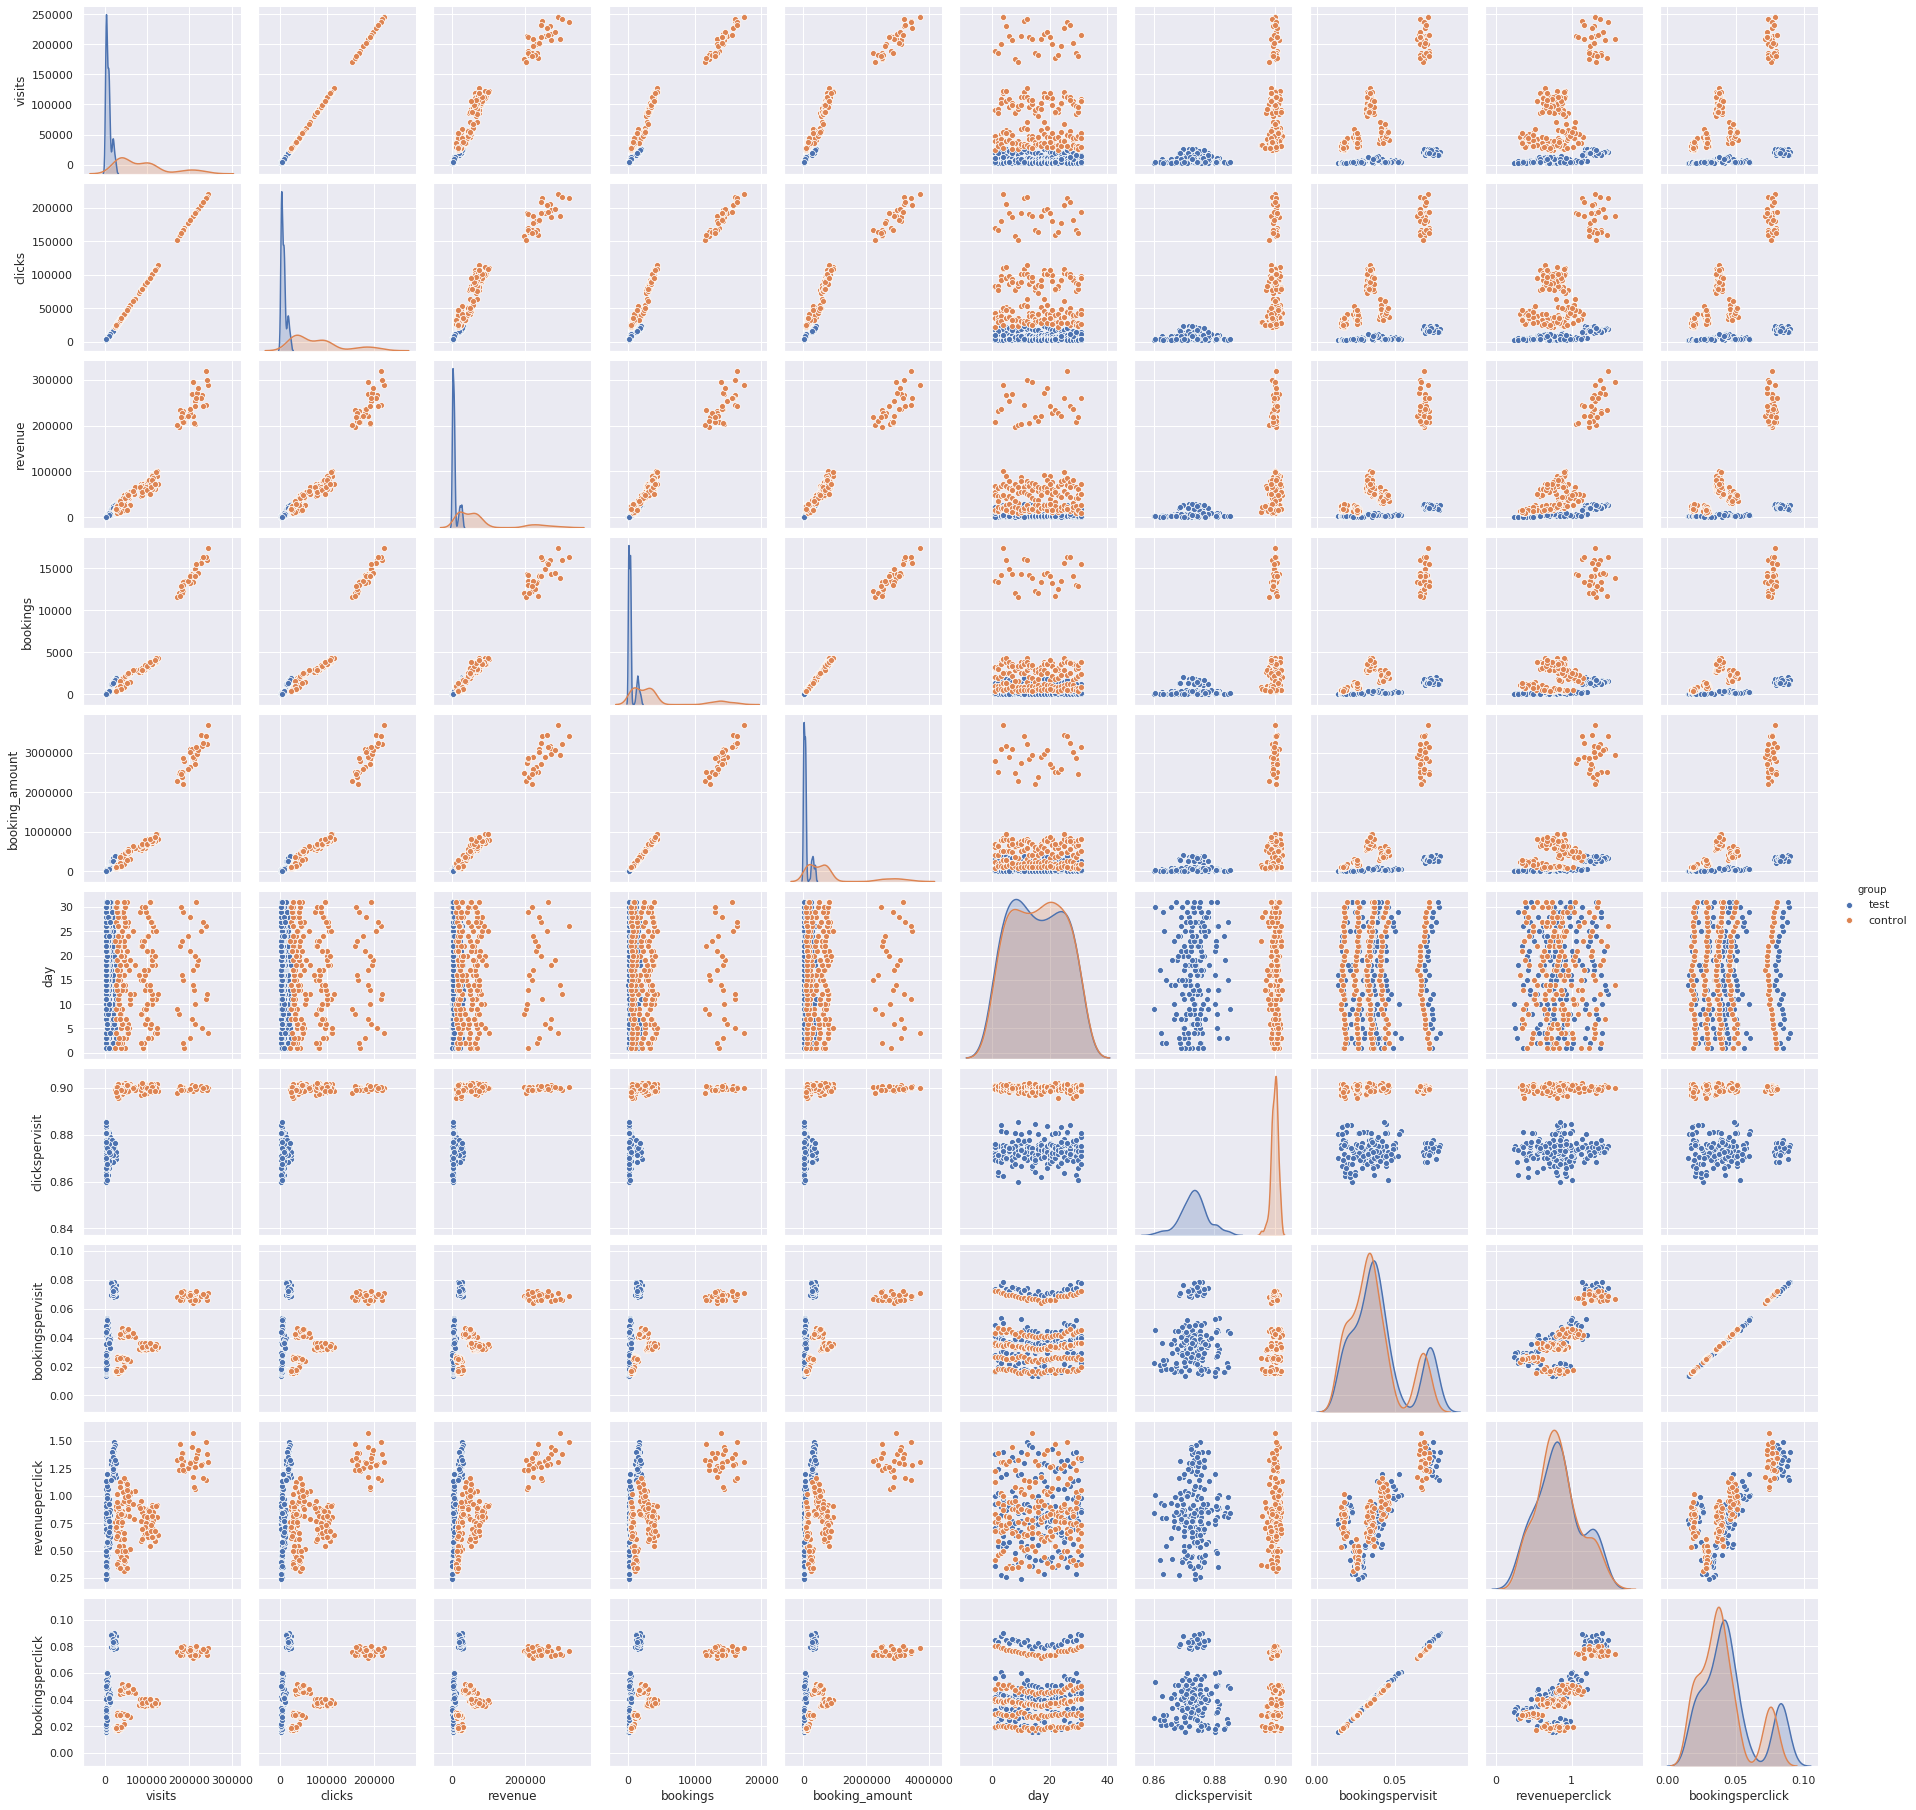

In [55]:
#Paitplot show pairwise relation between all the variables in the dataframe
sns.pairplot(df_test2, hue="group");

#### On the basis of ClicksperVisit

group   AvgClicksPerVisit for Control  AvgClicksPerVisit for test
locale                                                           
AU                           0.900382                    0.874451
BR                           0.899802                    0.872908
DE                           0.899936                    0.873378
JP                           0.899566                    0.873052
UK                           0.900113                    0.872704
US                           0.899860                    0.873780


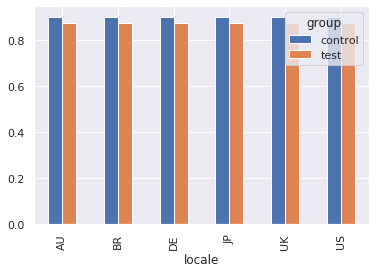

In [56]:
print(df_test2.groupby(['locale','group']).clickspervisit.mean().unstack().rename(columns={'control':'AvgClicksPerVisit for Control','test':'AvgClicksPerVisit for test'}))
df_test2.groupby(['locale','group']).clickspervisit.mean().unstack().plot(kind='bar')
plt.show()

##### Comparing clickspervisit's Distribuition between Control and Test group

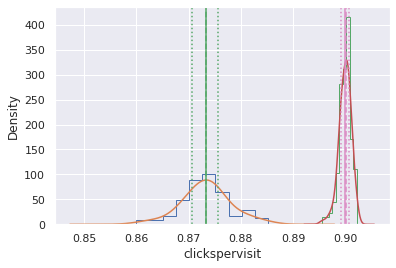

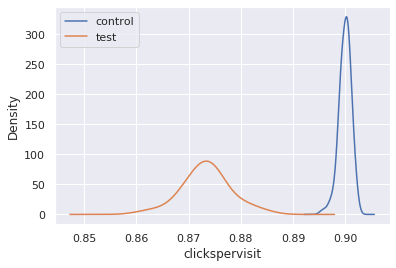

In [57]:
# Plotting both distribution together
df_test2.query('group=="test"').clickspervisit.plot(kind='hist', histtype='step', density=True)
df_test2.query('group=="test"').clickspervisit.plot.density(bw_method=0.5)
# Line of Mean
plt.axvline(df_test2.query('group=="test"').clickspervisit.mean(), c='C2')
# Line of Median
plt.axvline(df_test2.query('group=="test"').clickspervisit.median(), c='C2', linestyle= '--')
# Line of 1st Quantile
plt.axvline(df_test2.query('group=="test"').clickspervisit.quantile(0.25), c='C2', linestyle= ':')
# Line of 2nd Quantile
plt.axvline(df_test2.query('group=="test"').clickspervisit.quantile(0.75), c='C2', linestyle= ':')
xlabel('clickspervisit');
df_test2.query('group=="control"').clickspervisit.plot(kind='hist', histtype='step', density=True)
df_test2.query('group=="control"').clickspervisit.plot.density(bw_method=0.5)
plt.axvline(df_test2.query('group=="control"').clickspervisit.mean(), c='C6')
plt.axvline(df_test2.query('group=="control"').clickspervisit.median(), c='C6', linestyle= '--')
plt.axvline(df_test2.query('group=="control"').clickspervisit.quantile(0.25), c='C6', linestyle= ':')
plt.axvline(df_test2.query('group=="control"').clickspervisit.quantile(0.75), c='C6', linestyle= ':');
plt.figure()
df_test2.query('group=="control"').clickspervisit.plot.density(bw_method=0.5)
df_test2.query('group=="test"').clickspervisit.plot.density(bw_method=0.5)
xlabel('clickspervisit');
legend(['control', 'test']);

* Distribution shows a significant difference between Control and Test Groups. Control Groups has higher conversion rate in terms of clickpervisit than Test Group

In [58]:
#Calculating average clickspervisit for Control and Test Group Globally
x = df_test2.groupby("group").clickspervisit.mean()
print(x.head())
print('Average Difference between Control and Test Group', x['control']- x['test'])
print('Percentage Difference: ',((x['control']- x['test'])/x['control'])*100)

group
control    0.89994
test       0.87338
Name: clickspervisit, dtype: float64
Average Difference between Control and Test Group 0.026559411280655643
Percentage Difference:  2.9512435866080198


#### Hypothesis Testing
* **H0(Null Hypothesis)**: There is no significant difference between average clickspervisit of control and test group distribution Globally
* **H1(Alternate Hypothesis)**: There is significant difference average clickspervisit of control and test group distribution Globally
* We consider H0 to be true. If **P-value or Significance value** <0.05, then we'll reject our H0 and accept H1 otherwise we accept H0 and reject H1

In [59]:
test_results = df_test2.query("group=='test'").clickspervisit
control_results = df_test2.query("group=='control'").clickspervisit
test_result = stats.ttest_ind(test_results, control_results, equal_var=False)
print('P-value result', test_result[1])
print(eval_test(test_result[1]))

P-value result 6.730440201181623e-172
We reject H0 and accept H1


* Therefore we proof statistically that there's significant difference between Control and Test Group, where test group doesn't perform better than control group clearly in terms of clickspervisit 

#### As Trivago have different **platform**(Country Specific) for each country, we now compare Control and Test Groups for each country on the basis of clickpervisit

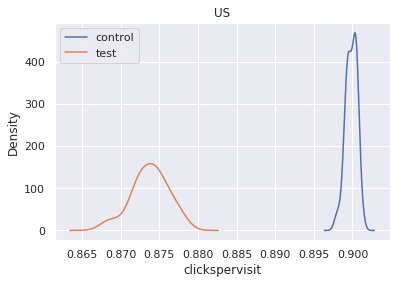

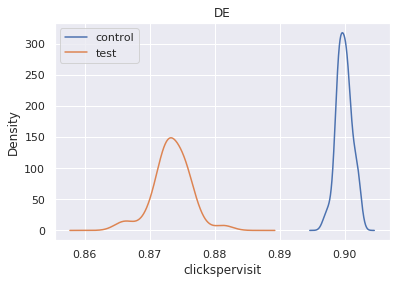

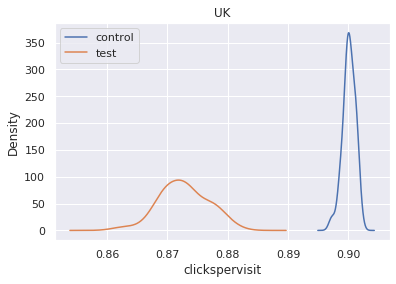

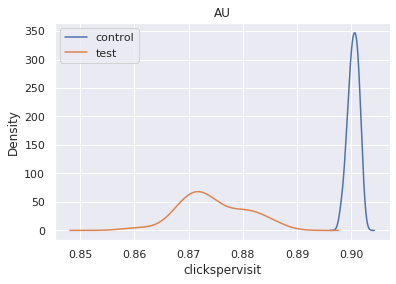

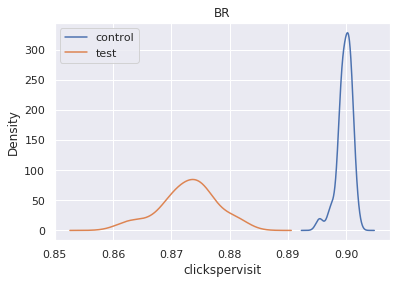

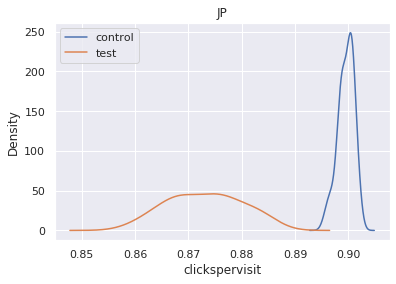

In [60]:
for i in df_test2.locale.unique():
    plt.figure()
    df_test2.query('group=="control" and locale==@i').clickspervisit.plot.density(bw_method=0.5)
    df_test2.query('group=="test" and locale==@i').clickspervisit.plot.density(bw_method=0.5)
    title(i)
    xlabel("clickspervisit")
    legend(['control', 'test']);

* Observation: There's significant difference between the avg of the two groups where control group performs better than test group 
* Proving it by Hypothesis testing 

In [61]:
avg_clickpervisit = df_test2.groupby(['locale','group']).clickspervisit.mean().unstack().rename(columns={'control':'Avg ClicksPerVisit for Control','test':'Avg ClicksPerVisit for Test'})
avg_clickpervisit

group   Avg ClicksPerVisit for Control  Avg ClicksPerVisit for Test
locale                                                             
AU                            0.900382                     0.874451
BR                            0.899802                     0.872908
DE                            0.899936                     0.873378
JP                            0.899566                     0.873052
UK                            0.900113                     0.872704
US                            0.899860                     0.873780

In [62]:
avg_clickpervisit['%change'] = ((avg_clickpervisit['Avg ClicksPerVisit for Control']-avg_clickpervisit['Avg ClicksPerVisit for Test'])/avg_clickpervisit['Avg ClicksPerVisit for Control'])*100
avg_clickpervisit

group   Avg ClicksPerVisit for Control  Avg ClicksPerVisit for Test   %change
locale                                                                       
AU                            0.900382                     0.874451  2.879936
BR                            0.899802                     0.872908  2.988826
DE                            0.899936                     0.873378  2.951165
JP                            0.899566                     0.873052  2.947459
UK                            0.900113                     0.872704  3.045078
US                            0.899860                     0.873780  2.898217

#### Hypothesis Testing
* **H0(Null Hypothesis)**: There is no significant difference between average clickspervisit of control and test group distribution per platform
* **H1(Alternate Hypothesis)**: There is significant difference average clickspervisit of control and test group distribution per platform
* We consider H0 to be true. If **P-value or Significance value** <0.05, then we'll reject our H0 and accept H1 otherwise we accept H0 and reject H1

In [63]:
for i in df_test2.locale.unique():
    test_results = df_test2.query("group=='test' and locale==@i").clickspervisit
    control_results = df_test2.query("group=='control'and locale==@i").clickspervisit
    test_result = stats.ttest_ind(test_results, control_results, equal_var=False)
    print('For Platform ',i,' P-Value:', test_result[1])
    print('For Platform ',i, ':',eval_test(test_result[1])) 

For Platform  US  P-Value: 6.56955645826082e-45
For Platform  US : We reject H0 and accept H1
For Platform  DE  P-Value: 1.0563919080499076e-42
For Platform  DE : We reject H0 and accept H1
For Platform  UK  P-Value: 3.340274207932707e-32
For Platform  UK : We reject H0 and accept H1
For Platform  AU  P-Value: 1.891408291788106e-23
For Platform  AU : We reject H0 and accept H1
For Platform  BR  P-Value: 7.443379631326688e-30
For Platform  BR : We reject H0 and accept H1
For Platform  JP  P-Value: 2.5382686801196627e-21
For Platform  JP : We reject H0 and accept H1


Plotting Separately for Each Platform


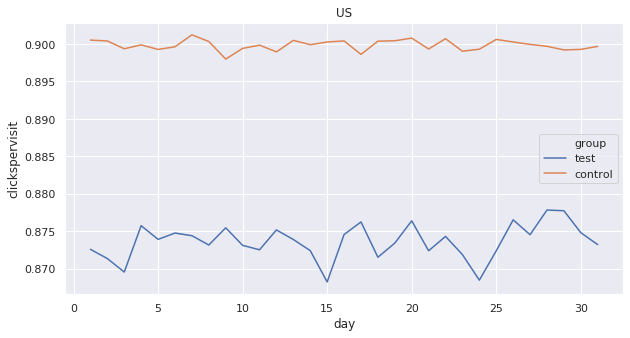

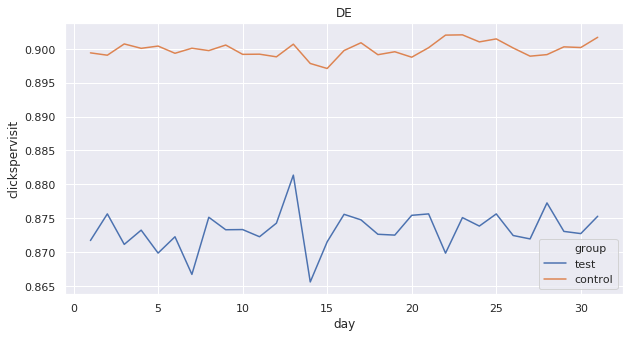

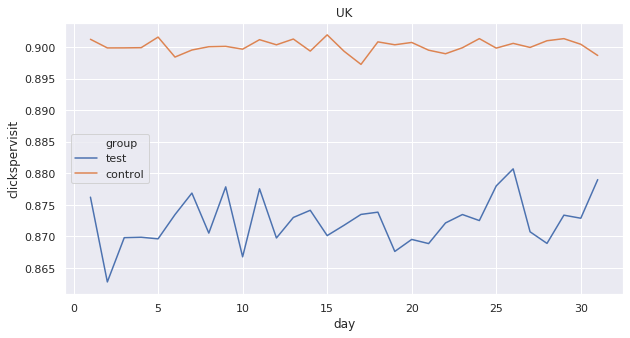

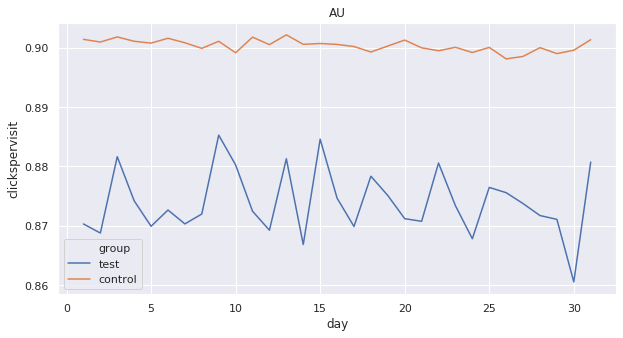

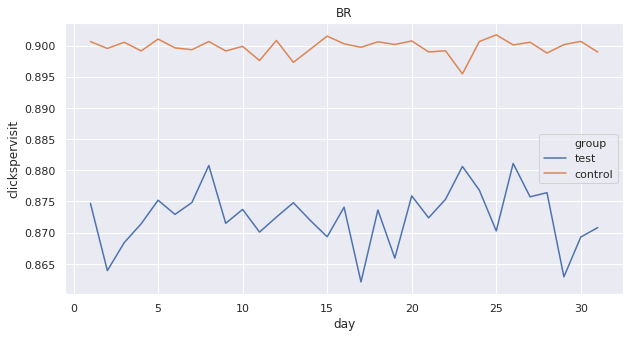

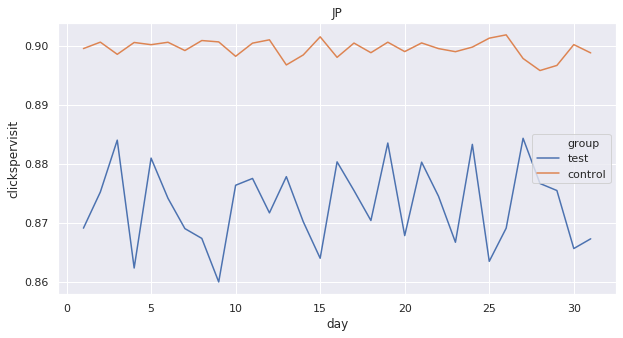

In [64]:
print('Plotting Separately for Each Platform')    
for i in df_test1.locale.unique():
    plt.figure(figsize=(10,5))
    title(i)
    g = sns.lineplot(x="day", y="clickspervisit", hue ='group', data=df_test2.query("locale ==@i"))

* There's a significant difference between test and control group even platformwise and Control group's performance is much better than Test Group
* Therefor on the basis clickspervisit we should **Develop the feature further before testing again**

#### Analysis on the basis of Bookingsperclick

group    control      test
locale                    
AU      0.047683  0.051958
BR      0.028532  0.031435
DE      0.037872  0.042439
JP      0.019086  0.020782
UK      0.037948  0.041542
US      0.076075  0.083599


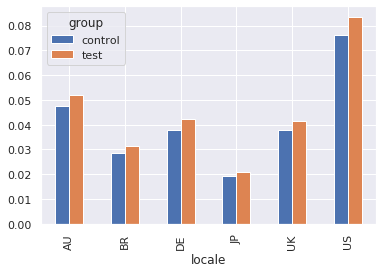

In [65]:
#Bar plot
print(df_test2.groupby(['locale','group']).bookingsperclick.mean().unstack())
df_test2.groupby(['locale','group']).bookingsperclick.mean().unstack().plot(kind='bar')
plt.show()

##### Comparing bookingsperclick's Distribuition between Control and Test group

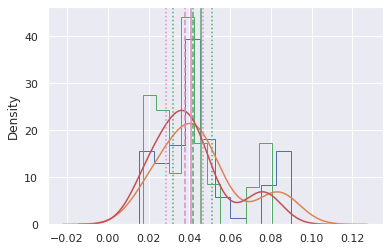

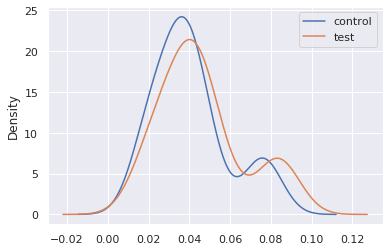

In [66]:
# Density plot between Test and Control Distribution
df_test2.query('group=="test"').bookingsperclick.plot(kind='hist', histtype='step', density=True)
df_test2.query('group=="test"').bookingsperclick.plot.density(bw_method=0.5)
plt.axvline(df_test2.query('group=="test"').bookingsperclick.mean(), c='C2')
plt.axvline(df_test2.query('group=="test"').bookingsperclick.median(), c='C2', linestyle= '--')
plt.axvline(df_test2.query('group=="test"').bookingsperclick.quantile(0.25), c='C2', linestyle= ':')
plt.axvline(df_test2.query('group=="test"').bookingsperclick.quantile(0.75), c='C2', linestyle= ':');
df_test2.query('group=="control"').bookingsperclick.plot(kind='hist', histtype='step', density=True)
df_test2.query('group=="control"').bookingsperclick.plot.density(bw_method=0.5)
plt.axvline(df_test2.query('group=="control"').bookingsperclick.mean(), c='C6')
plt.axvline(df_test2.query('group=="control"').bookingsperclick.median(), c='C6', linestyle= '--')
plt.axvline(df_test2.query('group=="control"').bookingsperclick.quantile(0.25), c='C6', linestyle= ':')
plt.axvline(df_test2.query('group=="control"').bookingsperclick.quantile(0.75), c='C6', linestyle= ':');
plt.figure()
df_test2.query('group=="control"').bookingsperclick.plot.density(bw_method=0.5)
df_test2.query('group=="test"').bookingsperclick.plot.density(bw_method=0.5)
legend(['control', 'test']);

In [67]:
#Calculating average Bookingsperclick for Control and Test Group Globally
x = df_test2.groupby("group").bookingsperclick.mean()
print(x.head())
print('Average Difference between Control and Test Group', x['control']- x['test'])
print('Percentage Difference', (abs(x['control']- x['test'])/x['control'])*100)

group
control    0.040773
test       0.045958
Name: bookingsperclick, dtype: float64
Average Difference between Control and Test Group -0.005184902133764609
Percentage Difference 12.716610058761354


* According to bookingperclicks there's a significant difference between Average of control and test group. And Test group generte higher quality traffic (Visitors that after clicking complete the booking on Hotel's site)

#### Hypothesis Testing
* **H0(Null Hypothesis)**: There is no significant difference between average bookingsperclick of control and test group distribution Globally
* **H1(Alternate Hypothesis)**: There is significant difference average bookingsperclick of control and test group distribution Globally
* We consider H0 to be true. If **P-value or Significance value** <0.05, then we'll reject our H0 and accept H1 otherwise we accept H0 and reject H1

In [68]:
test_results = df_test2.query("group=='test'").bookingsperclick
control_results = df_test2.query("group=='control'").bookingsperclick
test_result = stats.ttest_ind(test_results, control_results, equal_var=False)
print('For Platform ',i,' P-Value:', test_result[1])
print('For Platform ',i, ':',eval_test(test_result[1])) 

For Platform  JP  P-Value: 0.006368410371197913
For Platform  JP : We reject H0 and accept H1


* Hence we accept the Alternate Hypothesis that there's significant difference between Test and Control group. And Traffic group generate higher quality Traffix

#### As Trivago have different **platform**(Country Specific) for each country, we now compare Control and Test Groups for each country on the basis of bookingsperclick

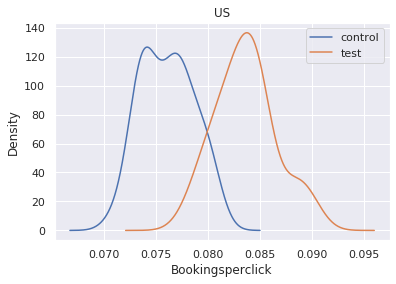

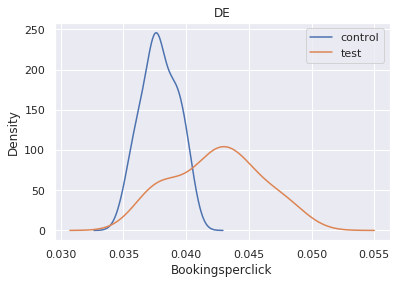

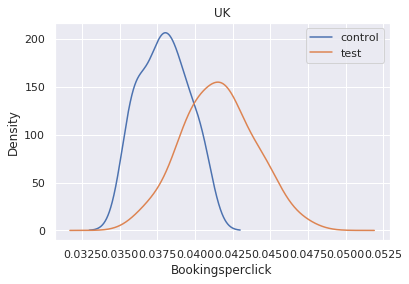

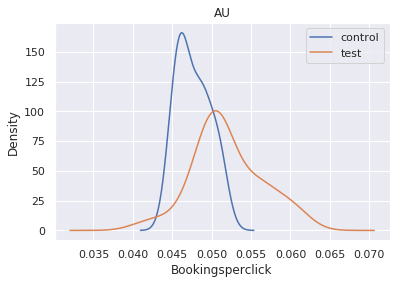

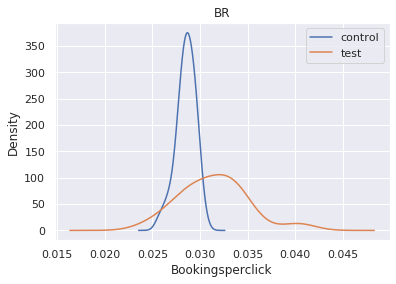

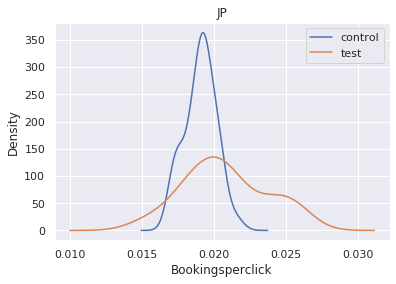

In [69]:
for i in df_test2.locale.unique():
    plt.figure()
    df_test2.query('group=="control" and locale==@i').bookingsperclick.plot.density(bw_method=0.5)
    df_test2.query('group=="test" and locale==@i').bookingsperclick.plot.density(bw_method=0.5)
    title(i)
    xlabel('Bookingsperclick')
    legend(['control', 'test']);

* Observation: There's a significant difference between the avg of the two groups where test group distribution leads.
* Proving it by Hypothesis testing 

In [70]:
avg_bookingsperclick = df_test1.groupby(['locale','group']).bookingsperclick.mean().unstack().rename(columns={'control':'Avg bookingsperclick for Control','test':'Avg bookingsperclick for Test'})
avg_bookingsperclick

group   Avg bookingsperclick for Control  Avg bookingsperclick for Test
locale                                                                 
AU                              0.047480                       0.047787
BR                              0.028362                       0.027739
DE                              0.036002                       0.036079
JP                              0.018954                       0.019719
UK                              0.036099                       0.036159
US                              0.059748                       0.059253

In [71]:
avg_bookingsperclick['%change']=((avg_bookingsperclick['Avg bookingsperclick for Control']-avg_bookingsperclick['Avg bookingsperclick for Test'])/avg_bookingsperclick['Avg bookingsperclick for Control'])*100
avg_bookingsperclick

group   Avg bookingsperclick for Control  Avg bookingsperclick for Test  \
locale                                                                    
AU                              0.047480                       0.047787   
BR                              0.028362                       0.027739   
DE                              0.036002                       0.036079   
JP                              0.018954                       0.019719   
UK                              0.036099                       0.036159   
US                              0.059748                       0.059253   

group    %change  
locale            
AU     -0.646500  
BR      2.195832  
DE     -0.212976  
JP     -4.037928  
UK     -0.166024  
US      0.828729

#### Hypothesis Testing
* **H0(Null Hypothesis)**: There is no significant difference between average Bookingsperclick of control and test group distribution per platform
* **H1(Alternate Hypothesis)**: There is significant difference average Bookingsperclick of control and test group distribution per platform
* We consider H0 to be true. If **P-value or Significance value** <0.05, then we'll reject our H0 and accept H1 otherwise we accept H0 and reject H1

In [72]:
for i in df_test2.locale.unique():
    test_results = df_test2.query("group=='test' and locale==@i").bookingsperclick
    control_results = df_test2.query("group=='control'and locale==@i").bookingsperclick
    test_result = stats.ttest_ind(test_results, control_results, equal_var=False)
    print('For Platform ',i,' P-Value:', test_result[1])
    print('For Platform ',i, ':',eval_test(test_result[1])) 

For Platform  US  P-Value: 7.413460581635808e-18
For Platform  US : We reject H0 and accept H1
For Platform  DE  P-Value: 2.137387293910336e-09
For Platform  DE : We reject H0 and accept H1
For Platform  UK  P-Value: 5.107449792231582e-10
For Platform  UK : We reject H0 and accept H1
For Platform  AU  P-Value: 6.6395263409659724e-06
For Platform  AU : We reject H0 and accept H1
For Platform  BR  P-Value: 3.7410581235980606e-05
For Platform  BR : We reject H0 and accept H1
For Platform  JP  P-Value: 0.003048632760079261
For Platform  JP : We reject H0 and accept H1


Plotting Separately for Each Platform


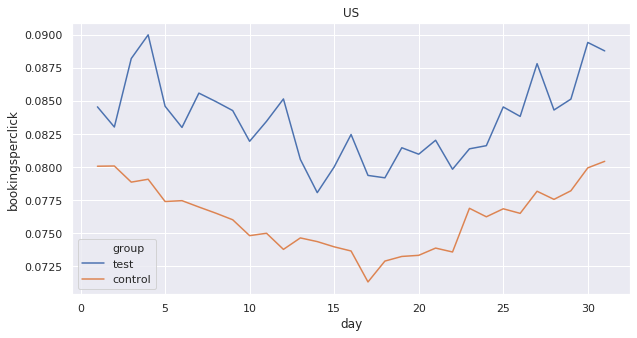

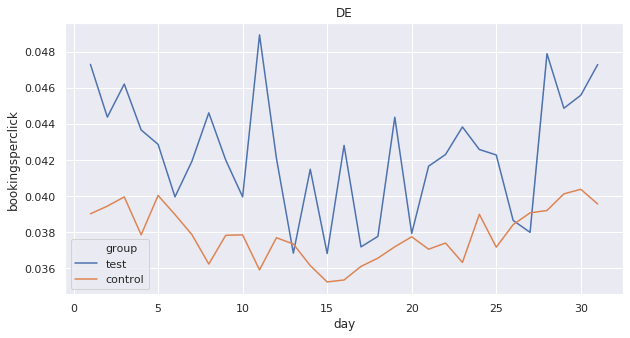

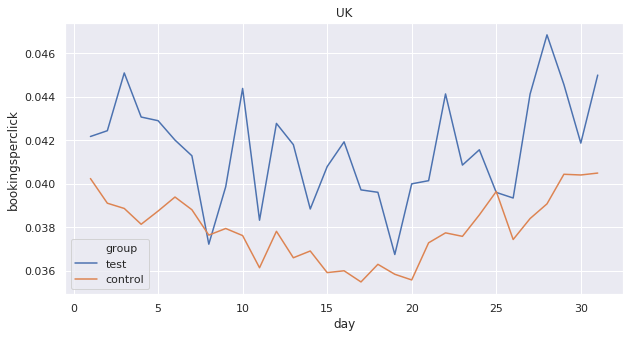

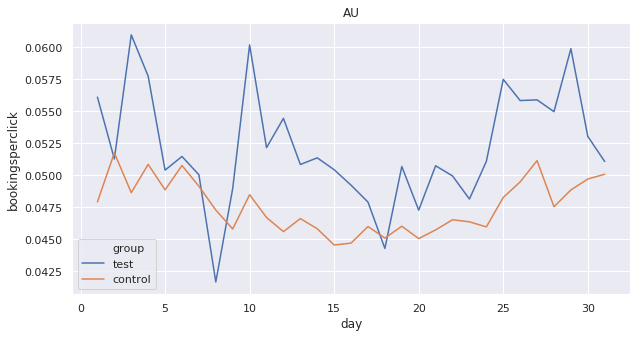

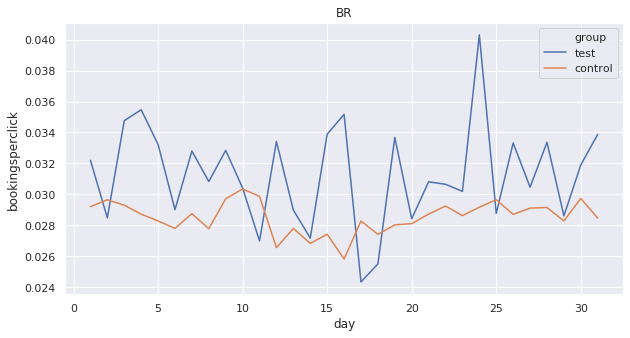

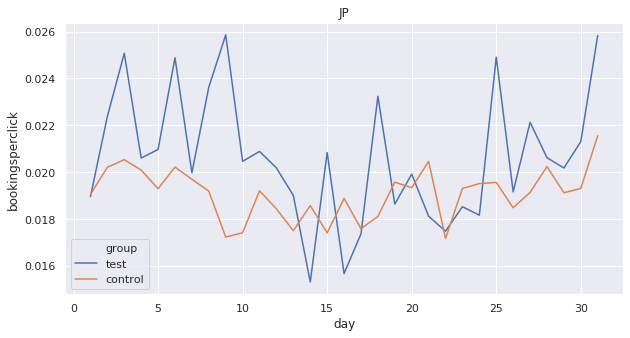

In [73]:
print('Plotting Separately for Each Platform')    
for i in df_test2.locale.unique():
    plt.figure(figsize=(10,5))
    title(i)
    g = sns.lineplot(x="day", y="bookingsperclick", hue ='group', data=df_test2.query("locale ==@i"))    

* There's a significant difference between test and control group even platformwise and Test Group's performance is much better than Test Group
* Test group generates higher quality traffic according to CPC model than Control
* Therefor on the basis Bookingsperclick we should **Roll-out the new feature to all users immediately**

* Analysis For Test2 
* According to **clickspervisit**: Control Group performs better than Test Group. AS Trivago is based per-per-click advertising. Hence we should **Develop the feature further before testing again**
* According to **Bookingsperclick**: Test Group performs better than Control Group and generates higher quality traffic thus positively influencing the CPC model of Trivago. Hence we should **Roll-out the new feature to all users immediately**

* Hence there's some ambiguity in the performance of the Test2. We should randomize the sampling more and then perform the Test 

### Thank you!